# Lab | Random Forests

#Instructions

Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.

Use Feature Selections that you have learned in class to decide if you want to use all of the features 
(Variance Threshold, RFE, PCA, etc.)

Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.

Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to 
the cost of the false negative? How would you change your algorithm or data in order to maximize the return 
of the business?

# PROCESS 1

In [1]:
# importing the needed datasets
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
#opening my files
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()# data is clearly imbalanced

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [3]:
# Checking the shape of my dataframe
data.shape

(95412, 339)

In [4]:
#checking for null values
data.isna().sum().sum()

0

In [5]:
# having a look in my dataframe columns
data.columns

Index(['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET',
       'VIETVETS', 'WWIIVETS', 'LOCALGOV',
       ...
       'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 'MAXRDATE_MM',
       'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 'FIRSTDATE_MM',
       'TARGET_B', 'TARGET_D'],
      dtype='object', length=339)

In [6]:
# checking the shape of my numerical dataframe
numerical.shape

(95412, 315)

In [7]:
# checking the shape of my categorical dataframe
categorical.shape

(95412, 22)

In [8]:
# X, y split
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [9]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(76329, 338)
(19083, 338)
(76329,)
(19083,)


In [10]:
# Splitting data in categorical and numerical
numericalX_train   = X_train.select_dtypes(np.number)
numericalX_test    = X_test.select_dtypes(np.number)
categoricalX_train = X_train.select_dtypes(object) 
categoricalX_test  = X_test.select_dtypes(object) 

In [11]:
from sklearn.preprocessing import OneHotEncoder
#categoricalX_train encoding
encoder = OneHotEncoder(drop='first').fit(categoricalX_train)
encoded_categorical_train = encoder.transform(categoricalX_train).toarray()
encoded_categorical_train = pd.DataFrame(encoded_categorical_train, columns=encoder.get_feature_names_out()) # needed to avoid error
#categoricalX_test encoding
encoded_categorical_test = encoder.transform(categoricalX_test).toarray()
encoded_categorical_test = pd.DataFrame(encoded_categorical_test, columns=encoder.get_feature_names_out())

In [12]:
from sklearn.preprocessing import MinMaxScaler
#numericalX_train scaling
transformer = MinMaxScaler().fit(numericalX_train)
scaled_numerical_train = transformer.transform(numericalX_train)
scaled_numerical_train = pd.DataFrame(scaled_numerical_train, columns=numericalX_train.columns)
#numericalX_test scaling
scaled_numerical_test  = transformer.transform(numericalX_test)
scaled_numerical_test  = pd.DataFrame(scaled_numerical_test, columns=numericalX_train.columns)

In [13]:
#Concatenating both dataframes for train and test post scalling and onehotencoding
X_train_treated = pd.concat([scaled_numerical_train, encoded_categorical_train], axis = 1)
X_test_treated  = pd.concat([scaled_numerical_test,  encoded_categorical_test],  axis = 1)

In [14]:
# Check my data
display(X_train_treated.head())
display(y_train)

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0  0.000017  0.762887  0.500000  0.666667  0.008299  0.000000  0.313131   
1  0.000000  0.536082  0.666667  1.000000  0.000000  0.000000  0.292929   
2  0.000017  0.608247  0.666667  0.111111  0.020747  0.000000  0.424242   
3  0.000017  0.783505  0.833333  0.666667  0.037344  0.010101  0.404040   
4  0.000052  0.556701  0.666667  0.222222  0.087137  0.333333  0.272727   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0  0.101010  0.686869  0.060606  0.121212  0.034483  1.000000  0.007153   
1  0.242424  0.383838  0.070707  0.080808  0.045977  1.000000  0.045856   
2  0.161616  0.626263  0.101010  0.020202  0.011494  0.111111  0.067304   
3  0.232323  0.414141  0.080808  0.030303  0.045977  0.666667  0.014063   
4  0.292929  0.181818  0.121212  0.020202  0.080460  1.000000  0.010040   

     POP902    POP903   POP90C1  POP90C2   POP90C3   POP90C4   POP90C5  \
0  0.009129  0.007683  1.000000      0.0  0.000000  0.474747  0.535354   
1  0.055403  0.044968  0.000000      0.0  1.000000  0.494949  0.515152   
2  0.091154  0.087309  1.000000      0.0  0.000000  0.454545  0.555556   
3  0.017853  0.013728  1.000000      0.0  0.000000  0.494949  0.515152   
4  0.012052  0.010988  0.939394      0.0  0.070707  0.505051  0.505051   

       ETH1      ETH2      ETH3      ETH4      ETH5  ETH6      ETH7      ETH8  \
0  0.757576  0.212121  0.000000  0.020202  0.020202   0.0  0.000000  0.000000   
1  0.757576  0.161616  0.090909  0.000000  0.010101   0.0  0.000000  0.000000   
2  0.989899  0.000000  0.000000  0.010101  0.020202   0.0  0.000000  0.000000   
3  0.787879  0.010101  0.010101  0.151515  0.111111   0.0  0.013889  0.050505   
4  0.888889  0.080808  0.000000  0.030303  0.040404   0.0  0.000000  0.000000   

       ETH9     ETH10     ETH11     ETH12     ETH13     ETH14  ETH15  \
0  0.000000  0.000000  0.021277  0.000000  0.000000  0.017544    0.0   
1  0.000000  0.000000  0.000000  0.000000  0.010309  0.000000    0.0   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.017544    0.0   
3  0.089552  0.021739  0.021277  0.013889  0.072165  0.017544    0.0   
4  0.014925  0.021739  0.000000  0.000000  0.020619  0.017544    0.0   

      ETH16    AGE901    AGE902    AGE903    AGE904    AGE905    AGE906  \
0  0.023256  0.404762  0.500000  0.547619  0.428571  0.535714  0.583333   
1  0.000000  0.416667  0.559524  0.607143  0.452381  0.583333  0.630952   
2  0.011628  0.595238  0.702381  0.738095  0.559524  0.642857  0.678571   
3  0.034884  0.476190  0.583333  0.630952  0.476190  0.571429  0.619048   
4  0.011628  0.309524  0.380952  0.416667  0.321429  0.428571  0.476190   

     AGE907     CHIL1     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
0  0.333333  0.363636  0.474747  0.171717  0.131313  0.212121  0.191919   
1  0.373333  0.393939  0.404040  0.202020  0.111111  0.181818  0.161616   
2  0.200000  0.505051  0.353535  0.151515  0.101010  0.161616  0.111111   
3  0.280000  0.343434  0.444444  0.232323  0.101010  0.161616  0.171717   
4  0.400000  0.545455  0.343434  0.121212  0.202020  0.383838  0.161616   

      AGEC4     AGEC5     AGEC6     AGEC7    CHILC1    CHILC2    CHILC3  \
0  0.131313  0.151515  0.121212  0.060606  0.141414  0.141414  0.353535   
1  0.151515  0.141414  0.121212  0.141414  0.141414  0.181818  0.343434   
2  0.080808  0.151515  0.252525  0.151515  0.232323  0.191919  0.303030   
3  0.141414  0.222222  0.141414  0.060606  0.151515  0.131313  0.353535   
4  0.131313  0.080808  0.040404  0.010101  0.222222  0.242424  0.343434   

     CHILC4    CHILC5    HHAGE1    HHAGE2    HHAGE3      HHN1      HHN2  \
0  0.212121  0.161616  0.282828  0.090909  0.252525  0.212121  0.383838   
1  0.191919  0.151515  0.353535  0.141414  0.323232  0.212121  0.333333   
2  0.151515  0.131313  0.464646  0.141414  0.444444  0.292929  0.494949   
3  0.212121  0.161616  0.343434  0.080808  0.292929  0.151515  0.383838   
4  0.131313

79401    0
86429    0
76729    1
38838    0
83012    0
        ..
21243    0
45891    0
42613    1
43567    0
68268    0
Name: TARGET_B, Length: 76329, dtype: int64

In [15]:
#Checking my data
X_train.head()
X_test.head()

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
58053     28  65.000000       6        9    0         0       24        42   
9484       1  58.000000       5        9    0         0       17        28   
13395      1  46.000000       7        8    1         0       28        44   
1466       0  61.611649       5        9    0         0       33        37   
2076       0  46.000000       3        2    0        49       16        32   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
58053        22         9         2       1        9   10575    3049    4490   
9484         42        10         3       6        3     659     152     192   
13395        22         2         4       0        8    1031     269     306   
1466         49         8         8       4        2    2540     732     821   
2076          3         9         1      41        9   12367    2589    2826   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
58053       98        0        2       47       53    90     2     1     4   
9484        99        0        0       44       56     5    95     0     0   
13395       99        0        0       49       51    93     0     0     4   
1466        99        0        0       51       49    99     0     0     1   
2076        99        0        0       62       38    74    17     1     5   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
58053     9     0     1     1     1      0      0      0      5      0      1   
9484      1     0     0     0     0      0      0      0      0      0      0   
13395     9     0     1     0     1      1      0      1      6      0      0   
1466      0     0     0     0     0      0      0      0      0      0      0   
2076     14     0     1     0     2      1      0      0      7      1      4   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
58053      2      35      42      45      39      47      50      20     47   
9484       1      34      44      49      36      46      51      27     35   
13395      4      30      39      41      31      40      43      30     36   
1466       0      33      42      45      33      43      46      30     30   
2076       2      26      30      33      24      32      35      31     53   

       CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  \
58053     36     17      9     25     19     12     11     13     12      22   
9484      36     28     17     14     19     16     15     10      9      13   
13395     37     27     14     23     30     19      7      5      2      18   
1466      45     25     12     18     24     23     14      6      3      13   
2076      36     11     19     46     26      5      2      1      0      23   

       CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  \
58053      18      31      17      12      33      15      31    26    40   
9484       13      30      20      24      17       3      15    18    23   
13395      12      28      22      20      12       2       9     8    25   
1466       12      33      24      18      13       3      12     9    30   
2076       22      34      14       7       1       0       0     7    23   

       HHN3  HHN4  HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  \
58053    33    18     6     2     63     10      9     18   159   235   65   
9484     58    37    18    10     31     15      9     45   239   311   91   
13395    67    46    19     8     62      9      3     27   282   335   99   
1466     61    38    15     4     70      6      3     21   247   309   94   
2076     70    47    17     5     66      9      1     24   285   333   89   

       DW2  DW3  DW4  DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  \
58053   34    1   27   26   12    0    0    0  1953  2155    8    8   87   13   
9484    88    6    8    2    0    9    9    0   254

In [16]:
#Checking my data = target
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [17]:
# Applying my Model -  RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated, y_train)
print(clf.score(X_train_treated, y_train))
print(clf.score(X_test_treated, y_test))

y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.9496521636599458
0.9475973379447676


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[18083,     0],
       [ 1000,     0]], dtype=int64)

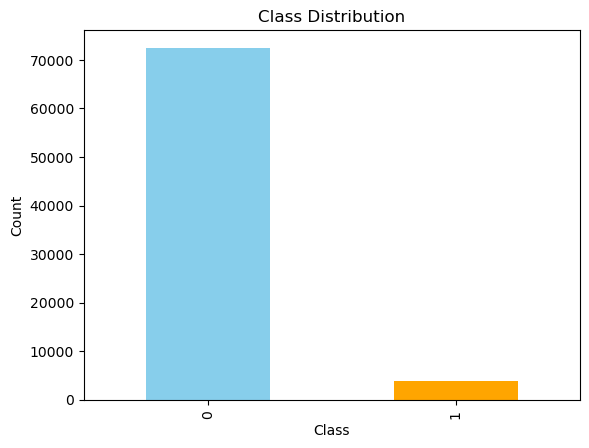

Class Distribution:
TARGET_B
0    72486
1     3843
Name: count, dtype: int64


In [18]:
# Checking for imbalanced data
import matplotlib.pyplot as plt
import pandas as pd

# Plotting class distribution
y_train.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Printing class distribution
print("Class Distribution:")
print(y_train.value_counts())

In [19]:
# Upsample category 1 to match the length of category 0
# need to reset_index on y_train to make sure they line up
trainset = pd.concat([X_train_treated, y_train.reset_index(drop=True)], axis=1)
category_1_upsampled = trainset[trainset['TARGET_B'] == 1].sample(len(trainset[trainset['TARGET_B'] == 0]), replace=True)
print(category_1_upsampled.shape)
category_0 = trainset[trainset['TARGET_B'] == 0]
print(category_0.shape)
# Concatenate the upsampled category 1 with category 0
trainset_new_upsampled = pd.concat([category_0, category_1_upsampled], axis=0)
trainset_new_upsampled = trainset_new_upsampled.sample(frac=1)  # randomize the rows
X_train_treated_upsampled = trainset_new_upsampled.drop(['TARGET_B'], axis=1)
y_train_upsampled = trainset_new_upsampled['TARGET_B']
print(X_train_treated_upsampled.shape)

(72486, 356)
(72486, 356)
(144972, 355)


In [20]:
print(X_train_treated_upsampled.shape)

(144972, 355)


In [21]:
# Now we can remove the column target d from the set of features
# reverting back to the name X_train
X_train_treated_upsampled = X_train_treated_upsampled.drop(['TARGET_D'], axis = 1).copy()
X_test_treated  = X_test_treated.drop(['TARGET_D'], axis = 1)


In [22]:
# Re-running my model after upsampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_treated_upsampled, y_train_upsampled)
print(clf.score(X_train_treated_upsampled, y_train_upsampled))
print(clf.score(X_test_treated, y_test))
y_pred = clf.predict(X_test_treated)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6252310791049306
0.599329245925693


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[10871,  7212],
       [  434,   566]], dtype=int64)

In [23]:
'''Analysis:
1. Before Upsampling:
Accuracy: The model achieved high accuracy, but this can be misleading in imbalanced datasets, as it 
predominantly predicts the majority class.
Confusion Matrix: The model predicted all instances as the majority class (0), resulting in no true positive 
predictions for the minority class (1).

2. After Upsampling:
Accuracy Drop: After upsampling, the accuracy dropped significantly, reflecting a more realistic performance 
assessment.
Improvement in Minority Class Prediction: The model now predicts some instances of the minority class (1), 
as evident from the non-zero values in the true positives and false negatives.

In conclusion, there are several things I can do to improve my model, but the most important is the feature
selection using my initial numerical dataframe.'''

'Analysis:\n1. Before Upsampling:\nAccuracy: The model achieved high accuracy, but this can be misleading in imbalanced datasets, as it \npredominantly predicts the majority class.\nConfusion Matrix: The model predicted all instances as the majority class (0), resulting in no true positive \npredictions for the minority class (1).\n\n2. After Upsampling:\nAccuracy Drop: After upsampling, the accuracy dropped significantly, reflecting a more realistic performance \nassessment.\nImprovement in Minority Class Prediction: The model now predicts some instances of the minority class (1), \nas evident from the non-zero values in the true positives and false negatives.\n\nIn conclusion, there are several things I can do to improve my model, but the most important is the feature\nselection using my initial numerical dataframe.'

# Feature Selection

In [24]:
#scalling y numerical dataframe
from sklearn.preprocessing import MinMaxScaler
#numerical scaling
transformer = MinMaxScaler().fit(numerical)
numerical_scaled = transformer.transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)
#Check my scaled numerical
numerical_scaled

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0      0.000000  0.608247  0.666667  1.000000  0.000000  0.000000  0.393939   
1      0.000014  0.463918  0.833333  1.000000  0.066390  0.000000  0.151515   
2      0.000014  0.624862  0.333333  0.111111  0.008299  0.000000  0.202020   
3      0.000000  0.711340  0.000000  0.444444  0.008299  0.000000  0.232323   
4      0.000000  0.793814  0.333333  0.222222  0.248963  0.010101  0.282828   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.000014  0.624862  0.666667  1.000000  0.000000  0.141414  0.363636   
95408  0.000014  0.484536  1.000000  1.000000  0.004149  0.000000  0.313131   
95409  0.000014  0.608247  0.666667  1.000000  0.000000  0.000000  0.181818   
95410  0.000000  0.587629  1.000000  1.000000  0.000000  0.000000  0.282828   
95411  0.000028  0.814433  0.666667  0.888889  0.012448  0.010101  0.333333   

       VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0      0.343434  0.181818  0.101010  0.020202  0.011494  0.555556  0.010051   
1      0.555556  0.111111  0.060606  0.020202  0.011494  1.000000  0.036585   
2      0.292929  0.333333  0.060606  0.080808  0.011494  0.111111  0.070931   
3      0.141414  0.313131  0.030303  0.000000  0.034483  0.000000  0.006484   
4      0.090909  0.535354  0.262626  0.030303  0.022989  1.000000  0.025532   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.474747  0.111111  0.070707  0.080808  0.149425  1.000000  0.277403   
95408  0.434343  0.191919  0.040404  0.010101  0.000000  1.000000  0.012705   
95409  0.464646  0.202020  0.070707  0.232323  0.000000  1.000000  0.005593   
95410  0.353535  0.202020  0.090909  0.010101  0.011494  0.777778  0.017690   
95411  0.222222  0.272727  0.080808  0.101010  0.034483  0.888889  0.039868   

         POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0      0.011108  0.009378  0.000000  0.353535  0.656566  0.474747  0.535354   
1      0.039552  0.028190  1.000000  0.000000  0.000000  0.505051  0.505051   
2      0.085837  0.075389  0.000000  0.020202  0.989899  0.494949  0.515152   
3      0.006732  0.006186  0.000000  0.080808  0.929293  0.545455  0.464646   
4      0.026382  0.021495  1.000000  0.000000  0.000000  0.464646  0.545455   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.305142  0.283507  1.000000  0.000000  0.000000  0.505051  0.505051   
95408  0.013549  0.010197  0.969697  0.000000  0.040404  0.515152  0.494949   
95409  0.005512  0.005790  1.000000  0.000000  0.000000  0.535354  0.474747   
95410  0.018177  0.014349  1.000000  0.000000  0.000000  0.474747  0.535354   
95411  0.050156  0.037906  1.000000  0.000000  0.000000  0.484848  0.525253   

           ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0      0.929293  0.010101  0.000000  0.000000  0.111111  0.000000  0.000000   
1      0.676768  0.000000  0.000000  0.313131  0.060606  0.181818  0.027778   
2      0.969697  0.020202  0.000000  0.000000  0.020202  0.000000  0.000000   
3      0.616162  0.000000  0.000000  0.111111  0.323232  0.272727  0.027778   
4      0.020202  0.989899  0.000000  0.000000  0.010101  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.101010  0.060606  0.040404  0.050505  0.000000  0.000000   
95408  0.919192  0.030303  0.000000  0.020202  0.060606  0.045455  0.000000   
95409  0.828283  0.141414  0.000000  0.010101  0.090909  0.000000  0.000000   
95410  0.929293  0.010101  0.010101  0.050505  0.080808  0.000000  0.013889   
95411  0.868687  0.121212  0.000000  0.010101  0.010101  0.000000  0.000000   

           ETH8      ETH9     ETH10  ETH11  ETH12     ETH13     ETH14  \
0      0.000000  0.000000  0.000000    0.0    0.0  0.113402  0.000000   
1      0.060606  0.059701  0.304348    0.0    0.0  0.020619  0.00000

In [25]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=50).fit_transform(X, y)
# Here we choose 50 best features
selected = pd.DataFrame(kbest)
selected.head()

0         1         2         3         4         5         6   \
0  0.666667  0.010101  0.079833  0.105833  0.230769  0.153846  0.070707   
1  0.833333  0.000000  0.911333  0.869667  0.923077  0.769231  0.090909   
2  0.333333  0.020202  0.082833  0.091000  0.153846  0.076923  0.181818   
3  0.000000  0.000000  0.166667  0.210500  0.153846  0.076923  0.060606   
4  0.333333  0.989899  0.096000  0.099000  0.307692  0.230769  0.000000   

         7         8         9         10        11        12        13  \
0  0.000000  0.000000  0.000000  0.020202  0.070707  0.131313  0.272727   
1  0.000000  0.000000  0.000000  0.979798  0.989899  0.989899  0.989899   
2  0.000000  0.010101  0.000000  0.000000  0.010101  0.060606  0.181818   
3  0.000000  0.000000  0.000000  0.101010  0.252525  0.505051  0.696970   
4  0.381818  0.585859  0.191919  0.000000  0.010101  0.020202  0.161616   

         14        15        16        17        18        19        20  \
0  0.474747  0.000000  0.020202  0.050505  0.171717  0.000000  0.212000   
1  1.000000  0.949495  0.919192  0.919192  0.919192  0.478632  0.730667   
2  0.505051  0.000000  0.000000  0.020202  0.090909  0.000000  0.194667   
3  0.929293  0.101010  0.010101  0.080808  0.171717  0.997863  0.258667   
4  0.676768  0.000000  0.252525  0.585859  0.747475  0.534188  0.166667   

         21        22        23        24        25    26        27        28  \
0  0.252000  0.131313  0.010101  0.010101  0.040404  0.00  0.020202  0.515152   
1  0.691333  0.020202  0.141414  0.333333  0.020202  0.28  0.323232  0.666667   
2  0.226667  0.323232  0.020202  0.010101  0.202020  0.00  0.010101  0.313131   
3  0.282000  0.272727  0.050505  0.040404  0.353535  0.00  0.050505  0.262626   
4  0.214000  0.242424  0.040404  0.020202  0.212121  0.00  0.030303  0.111111   

         29        30        31        32        33        34        35  \
0  0.010101  0.000000  0.000000  0.161616  0.040404  0.030303  0.161616   
1  0.030303  0.000000  0.000000  0.050505  0.303030  0.202020  0.000000   
2  0.111111  0.000000  0.000000  0.222222  0.050505  0.030303  0.080808   
3  0.202020  0.000000  0.000000  0.282828  0.030303  0.050505  0.161616   
4  0.141414  0.010101  0.010101  0.161616  0.121212  0.050505  0.202020   

         36        37        38        39        40   41        42        43  \
0  0.747475  0.141414  0.313131  0.545455  0.464646  0.0  0.285714  0.433333   
1  0.393939  0.565657  0.979798  1.000000  0.000000  0.0  0.952381  0.183333   
2  0.848485  0.232323  0.505051  0.696970  0.313131  0.0  0.428571  0.416667   
3  0.676768  0.191919  0.393939  0.454545  0.555556  0.0  0.761905  0.433333   
4  0.656566  0.030303  0.060606  0.333333  0.676768  0.0  0.285714  0.700000   

         44        45        46        47        48        49  
0  0.366492  0.127119  0.341463  0.498045  1.000000  0.622951  
1  0.146597  0.008475  0.024390  0.774510  0.333333  0.000000  
2  0.308901  0.110169  0.341463  0.078617  1.000000  0.967213  
3  0.324607  0.063559  0.170732  0.899764  1.000000  0.655738  
4  0.570681  0.152542  0.195122  0.037079  0.333333  0.409836

In [26]:
# To check the scores
model = SelectKBest(chi2, k=50).fit(X, y)
# Create a DataFrame with scores and column names
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical_scaled.columns
cols = df.sort_values(by = ['score'], ascending = False).head(50)['Column']
cols

313      RFA_2F
305    CARDGIFT
110        HVP1
111        HVP2
112        HVP3
115        HVP6
113        HVP4
22         ETH2
129         RP1
130         RP2
304    NGIFTALL
83          HV1
84          HV2
108       ETHC5
107       ETHC4
299    CARDPROM
300     NUMPROM
131         RP3
114        HVP5
314    CLUSTER2
2        INCOME
86          HV4
85          HV3
150        IC15
133         MSA
158        IC23
311    CONTROLN
162       HHAS4
161       HHAS3
279         HC6
266       POBC2
149        IC14
295       MHUC1
281         HC8
233         EC7
156        IC21
137         IC2
141         IC6
91          HU5
168        TPE3
139         IC4
228         EC2
234         EC8
109       ETHC6
249         VC4
278         HC5
169        TPE4
146        IC11
280         HC7
282         HC9
Name: Column, dtype: object

In [27]:
# Check multicollinearity
numerical_data = pd.concat([numerical_scaled[cols], targets['TARGET_B']], axis=1)
corr = numerical_data.corr()
corr
best_corr= corr.sort_values(by = 'TARGET_B', ascending=False)
best_corr_list = best_corr['TARGET_B']
best_corr_list

TARGET_B    1.000000
RFA_2F      0.072311
CARDGIFT    0.054027
NGIFTALL    0.050896
NUMPROM     0.033161
CARDPROM    0.032467
HV2         0.025607
HV1         0.025012
HVP4        0.024186
HVP3        0.024175
HVP2        0.023514
HVP1        0.022948
HVP5        0.022034
IC4         0.020535
HHAS3       0.020252
HV3         0.020191
HV4         0.020085
RP2         0.019928
HVP6        0.019869
IC2         0.019828
RP1         0.019158
MHUC1       0.018195
RP3         0.017939
EC7         0.017818
IC11        0.016961
INCOME      0.016508
EC8         0.016443
IC14        0.014884
IC23        0.014821
IC21        0.013339
CONTROLN    0.013165
MSA         0.011018
HC6         0.010803
HC7         0.010363
HC9         0.008515
HC5         0.008399
HU5         0.007898
HC8        -0.009124
TPE3       -0.012178
TPE4       -0.012396
VC4        -0.013304
ETHC6      -0.013369
IC6        -0.014362
EC2        -0.015423
CLUSTER2   -0.016390
IC15       -0.017081
HHAS4      -0.017448
POBC2      -0

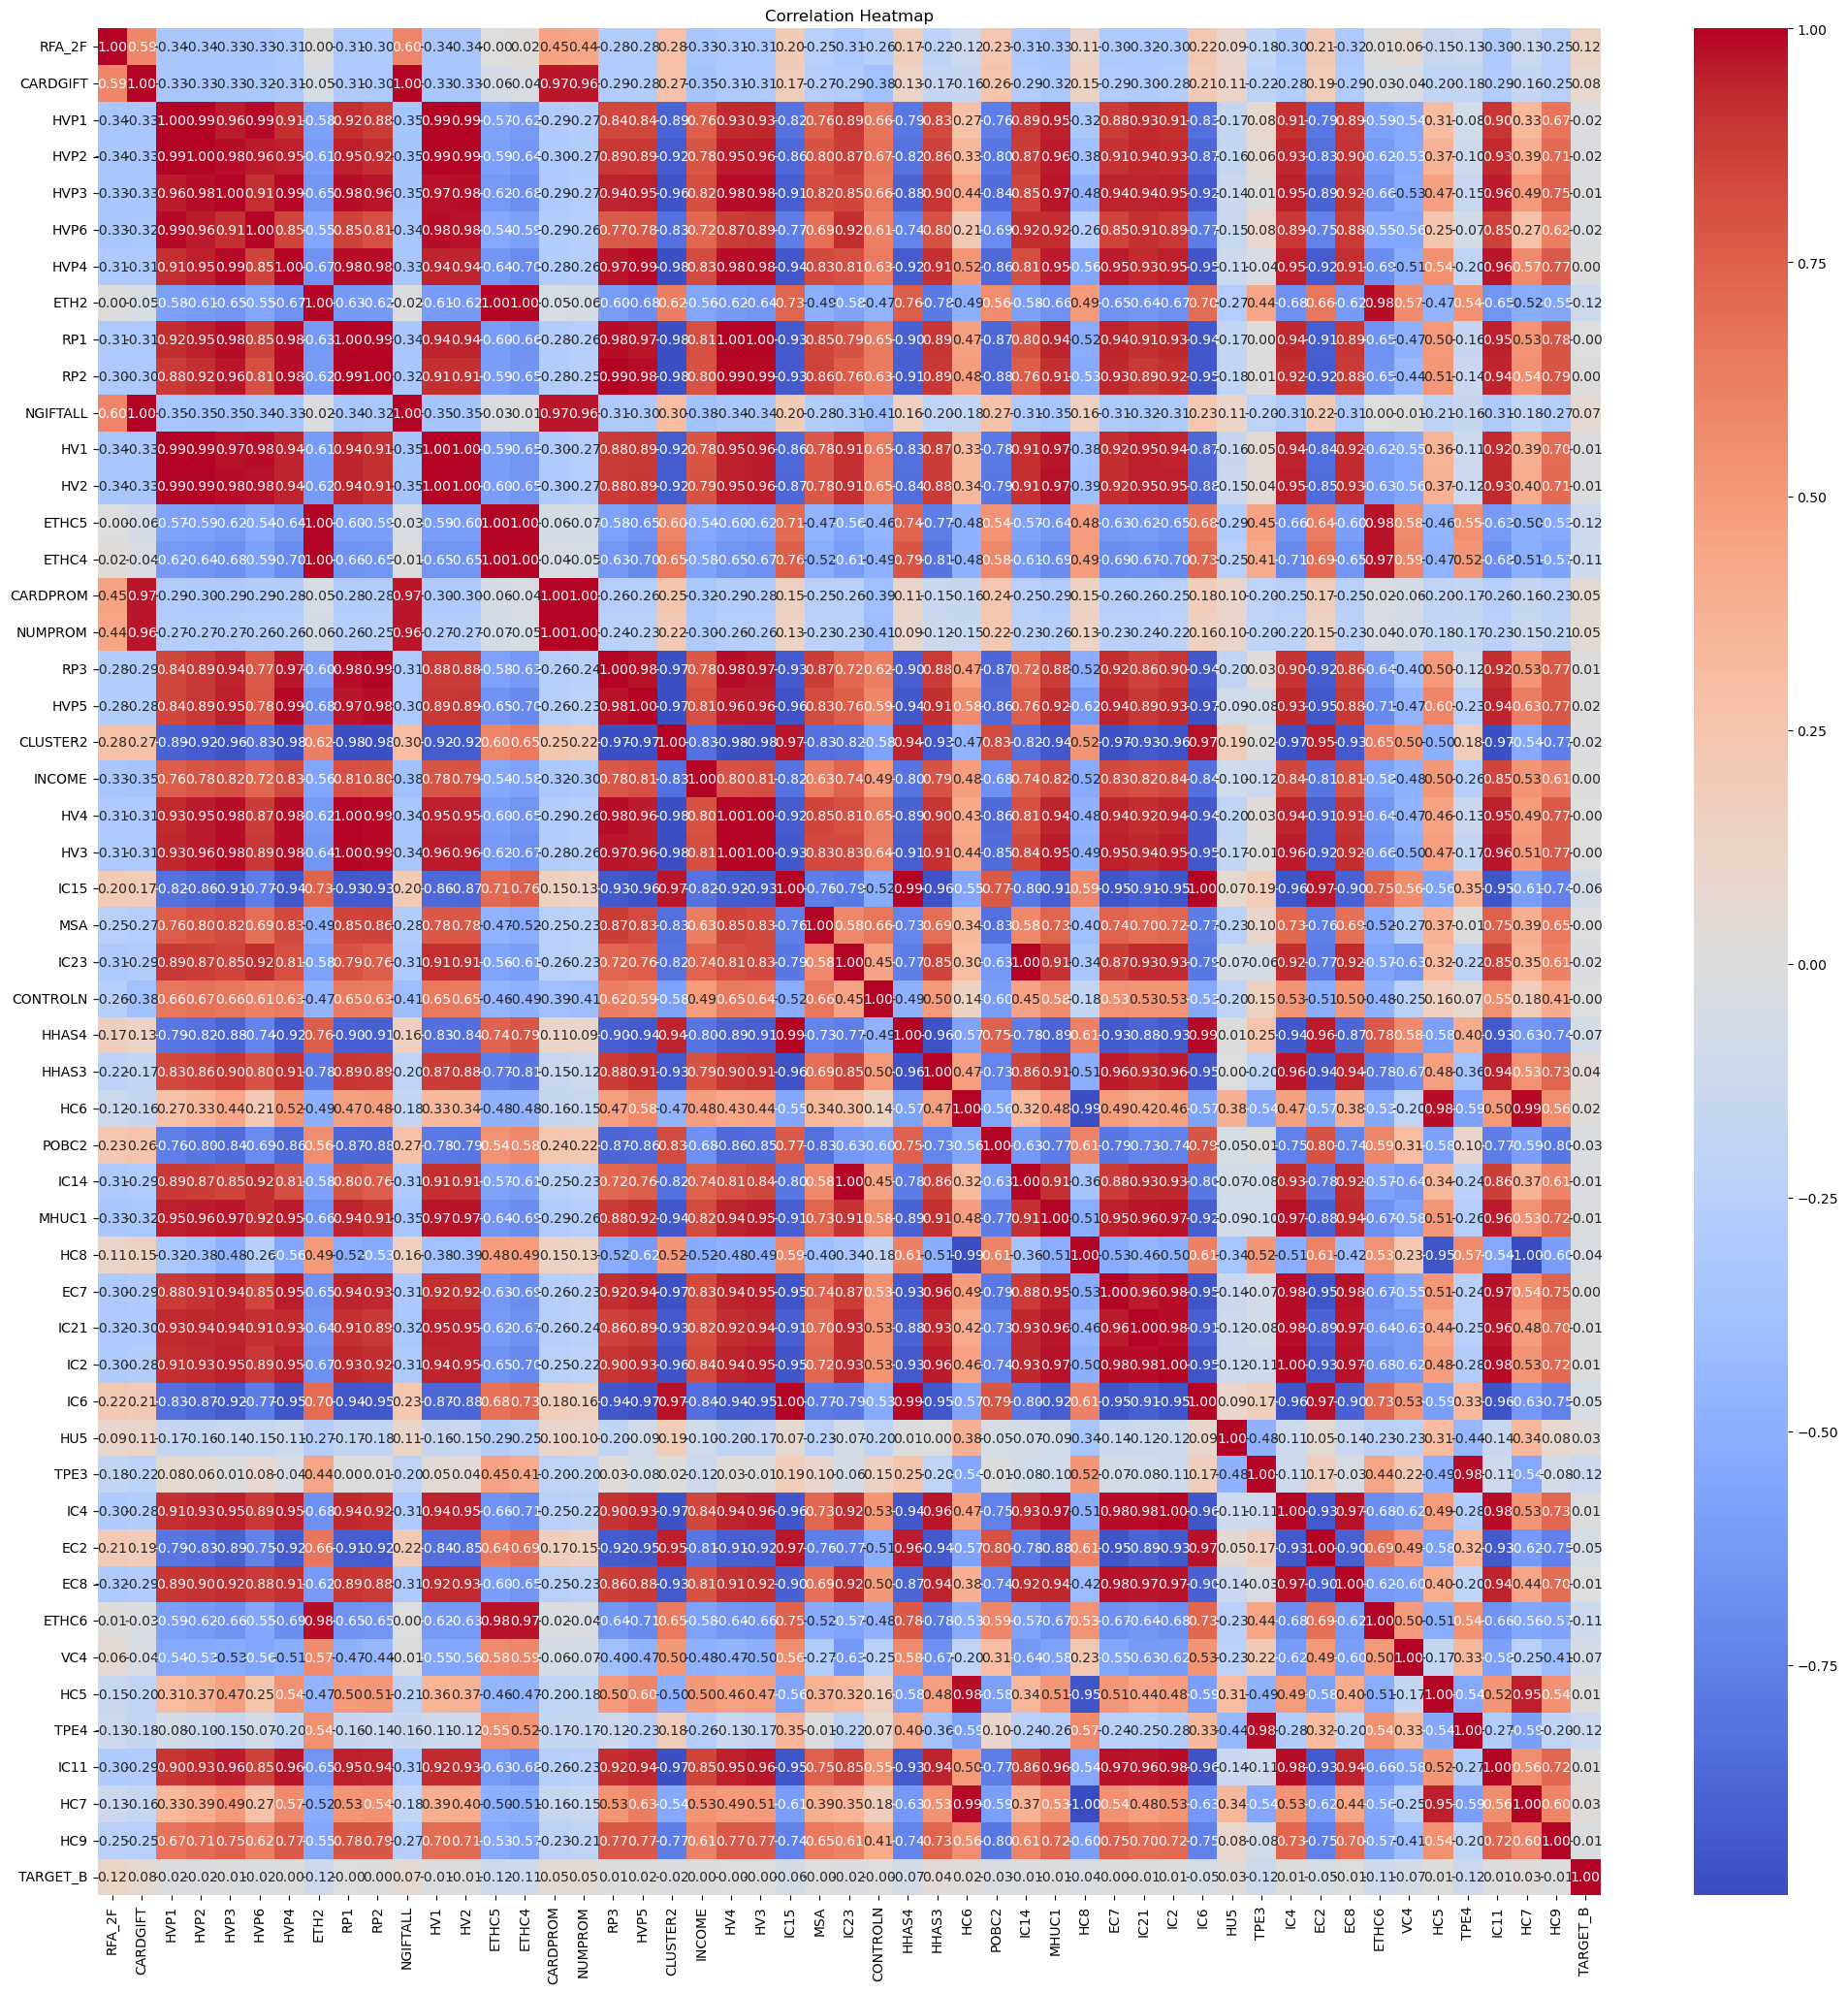

In [28]:
# Plot the top features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
correlation_matrix = best_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
# From the best correlation list to the TARGET filtering just the ones with highest values and do not have repeated prefix

best_corr_list = {
    'COLUMN': ['TARGET_B', 'RFA_2F', 'CARDGIFT', 'NGIFTALL', 'NUMPROM', 'CARDPROM', 'HV2', 'HV1', 'HVP4', 'HVP3', 'HVP2', 'HVP1', 'HVP5', 'IC4', 'HHAS3', 'HV3', 'HV4', 'RP2', 'HVP6', 'IC2', 'RP1', 'MHUC1', 'RP3', 'EC7', 'IC11', 'INCOME', 'EC8', 'IC14', 'IC23', 'IC21', 'CONTROLN', 'MSA', 'HC6', 'HC7', 'HC9', 'HC5', 'HU5', 'HC8', 'TPE3', 'TPE4', 'VC4', 'ETHC6', 'IC6', 'EC2', 'CLUSTER2', 'IC15', 'HHAS4', 'POBC2', 'ETHC5', 'ETH2', 'ETHC4'],
    'SCORE': [1.000000, 0.072311, 0.054027, 0.050896, 0.033161, 0.032467, 0.025607, 0.025012, 0.024186, 0.024175, 0.023514, 0.022948, 0.022034, 0.020535, 0.020252, 0.020191, 0.020085, 0.019928, 0.019869, 0.019828, 0.019158, 0.018195, 0.017939, 0.017818, 0.016961, 0.016508, 0.016443, 0.014884, 0.014821, 0.013339, 0.013165, 0.011018, 0.010803, 0.010363, 0.008515, 0.008399, 0.007898, -0.009124, -0.012178, -0.012396, -0.013304, -0.013369, -0.014362, -0.015423, -0.016390, -0.017081, -0.017448, -0.017562, -0.018689, -0.019040, -0.019885]
}

df1 = pd.DataFrame(best_corr_list)
# Extract prefixes before the numeric part
df1['Prefix'] = df1['COLUMN'].str.extract(r'([a-zA-Z]+)')
# Create an empty dictionary to store selected columns
selected_columns = {}
# Iterate through the DataFrame
for index, row in df1.iterrows():
    column = row['COLUMN']
    prefix = row['Prefix']
    value = row['SCORE']
        # Check if the prefix is already in the selected columns dictionary
    if prefix not in selected_columns:
        selected_columns[prefix] = {'COLUMN': column, 'SCORE': value}
    else:
        # Compare values and keep the column with the higher value
        if value > selected_columns[prefix]['SCORE']:
            selected_columns[prefix] = {'COLUMN': column, 'SCORE': value}

# Create a new DataFrame with the selected columns
cols_to_keep = pd.DataFrame(list(selected_columns.values()))
# Display the result
cols_to_keep

COLUMN     SCORE
0   TARGET_B  1.000000
1     RFA_2F  0.072311
2   CARDGIFT  0.054027
3   NGIFTALL  0.050896
4    NUMPROM  0.033161
5   CARDPROM  0.032467
6        HV2  0.025607
7       HVP4  0.024186
8        IC4  0.020535
9      HHAS3  0.020252
10       RP2  0.019928
11     MHUC1  0.018195
12       EC7  0.017818
13    INCOME  0.016508
14  CONTROLN  0.013165
15       MSA  0.011018
16       HC6  0.010803
17       HU5  0.007898
18      TPE3 -0.012178
19       VC4 -0.013304
20     ETHC6 -0.013369
21  CLUSTER2 -0.016390
22     POBC2 -0.017562
23      ETH2 -0.019040

In [30]:
# From my original numerical drop all columns except the 'cols_to_keep'
columns_to_keep = cols_to_keep['COLUMN'].tolist()
numerical_selected = numerical_scaled.drop(numerical.columns.difference(columns_to_keep), axis=1)
numerical_selected.head()

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0  0.666667  0.010101  0.105833  0.070707  0.000000  0.272727  0.050505   
1  0.833333  0.000000  0.869667  0.090909  0.000000  0.989899  0.919192   
2  0.333333  0.020202  0.091000  0.181818  0.000000  0.181818  0.020202   
3  0.000000  0.000000  0.210500  0.060606  0.000000  0.696970  0.080808   
4  0.333333  0.989899  0.099000  0.000000  0.191919  0.161616  0.585859   

        MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0  0.000000  0.252000  0.515152  0.000000  0.040404  0.161616  0.747475   
1  0.478632  0.691333  0.666667  0.000000  0.303030  0.000000  0.393939   
2  0.000000  0.226667  0.313131  0.000000  0.050505  0.080808  0.848485   
3  0.997863  0.282000  0.262626  0.000000  0.030303  0.161616  0.676768   
4  0.534188  0.214000  0.111111  0.010101  0.121212  0.202020  0.656566   

        HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0  0.313131  0.285714  0.433333  0.366492  0.127119  0.341463  0.498045   
1  0.979798  0.952381  0.183333  0.146597  0.008475  0.024390  0.774510   
2  0.505051  0.428571  0.416667  0.308901  0.110169  0.341463  0.078617   
3  0.393939  0.761905  0.433333  0.324607  0.063559  0.170732  0.899764   
4  0.060606  0.285714  0.700000  0.570681  0.152542  0.195122  0.037079   

     RFA_2F  CLUSTER2  
0  1.000000  0.622951  
1  0.333333  0.000000  
2  1.000000  0.967213  
3  1.000000  0.655738  
4  0.333333  0.409836

In [31]:
print(numerical_selected.shape)
print(categorical.shape)

(95412, 23)
(95412, 22)


In [32]:
#getting my numerical features selection, categorical and targets concatenated
new_data_feature_selected = pd.concat([numerical_selected, categorical, targets['TARGET_B']], axis=1).reset_index(drop=True)
new_data_feature_selected

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0      0.666667  0.010101  0.105833  0.070707  0.000000  0.272727  0.050505   
1      0.833333  0.000000  0.869667  0.090909  0.000000  0.989899  0.919192   
2      0.333333  0.020202  0.091000  0.181818  0.000000  0.181818  0.020202   
3      0.000000  0.000000  0.210500  0.060606  0.000000  0.696970  0.080808   
4      0.333333  0.989899  0.099000  0.000000  0.191919  0.161616  0.585859   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.666667  0.101010  0.170833  0.030303  0.000000  0.737374  0.848485   
95408  1.000000  0.030303  0.287167  0.000000  0.000000  0.919192  0.262626   
95409  0.666667  0.141414  0.062833  0.101010  0.010101  0.010101  0.343434   
95410  1.000000  0.010101  0.409833  0.000000  0.000000  1.000000  0.888889   
95411  0.666667  0.121212  0.174833  0.101010  0.010101  0.757576  0.656566   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0      0.000000  0.252000  0.515152  0.000000  0.040404  0.161616  0.747475   
1      0.478632  0.691333  0.666667  0.000000  0.303030  0.000000  0.393939   
2      0.000000  0.226667  0.313131  0.000000  0.050505  0.080808  0.848485   
3      0.997863  0.282000  0.262626  0.000000  0.030303  0.161616  0.676768   
4      0.534188  0.214000  0.111111  0.010101  0.121212  0.202020  0.656566   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.040598  0.356667  0.707071  0.020202  0.151515  0.252525  0.262626   
95408  0.358974  0.566000  0.616162  0.040404  0.363636  0.151515  0.515152   
95409  0.431624  0.230000  0.262626  0.000000  0.111111  0.202020  0.828283   
95410  0.933226  0.370667  0.464646  0.000000  0.151515  0.080808  0.505051   
95411  0.982906  0.346000  0.545455  0.010101  0.282828  0.151515  0.484848   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0      0.313131  0.285714  0.433333  0.366492  0.127119  0.341463  0.498045   
1      0.979798  0.952381  0.183333  0.146597  0.008475  0.024390  0.774510   
2      0.505051  0.428571  0.416667  0.308901  0.110169  0.341463  0.078617   
3      0.393939  0.761905  0.433333  0.324607  0.063559  0.170732  0.899764   
4      0.060606  0.285714  0.700000  0.570681  0.152542  0.195122  0.037079   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.787879  0.761905  0.083333  0.052356  0.000000  0.000000  0.962399   
95408  0.949495  0.857143  0.050000  0.031414  0.000000  0.000000  0.639828   
95409  0.000000  0.238095  0.216667  0.151832  0.025424  0.097561  0.988852   
95410  0.171717  0.571429  0.583333  0.643979  0.169492  0.439024  0.024466   
95411  0.868687  0.380952  0.516667  0.706806  0.161017  0.268293  0.965246   

         RFA_2F  CLUSTER2  STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R  \
0      1.000000  0.622951     IL       36        H      F         3      L   
1      0.333333  0.000000     CA       14        H      M         3      L   
2      1.000000  0.967213     NC       43        U      M         3      L   
3      1.000000  0.655738     CA       44        U      F         3      L   
4      0.333333  0.409836     FL       16        H      F         3      L   
...         ...       ...    ...      ...      ...    ...       ...    ...   
95407  0.000000  0.180328  other       27        H      M         3      L   
95408  0.000000  0.016393     TX       24        H      M         3      L   
95409  0.666667  0.540984     MI       30        H      M         3      L   
95410  1.000000  0.163934     CA       24        H      F         2      L   
95411  0.000000  0.180328     NC       24        U      F         3      L   

      RFA_2A GEOCODE2 DOMAIN_A  DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  \
0          E        C        T         2         89          1      37   
1          G        A        S         1         94          1      52   
2  

In [33]:
# X, y split using the new data with less numerical features
y_feature = new_data_feature_selected['TARGET_B']
X_feature = new_data_feature_selected.drop(['TARGET_B'], axis = 1)

In [34]:
#Checking the shape
X_feature.shape
y_feature.shape

(95412,)

In [35]:
# Getting my upsampled data (numerical features selected and scaled + categorical encoded) cooncatenated
new_train_data_oversampled=pd.concat([X_train_treated_upsampled[numerical_selected.columns],X_train_treated_upsampled[encoded_categorical_train.columns]], axis=1 )

In [36]:
# checking the shape
new_train_data_oversampled.shape

(144972, 47)

In [37]:
# Getting my test data (numerical features selected and scaled + categorical encoded) cooncatenated
X_test_2 = pd.concat([X_test_treated[numerical_selected.columns], X_test_treated[encoded_categorical_test.columns]], axis=1)
X_test_2

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
0      0.833333  0.020202  0.359167  0.020202  0.000000  0.949495  0.909091   
1      0.666667  0.959596  0.044333  0.000000  0.185185  0.010101  0.101010   
2      1.000000  0.000000  0.386500  0.000000  0.000000  0.989899  0.979798   
3      0.666667  0.000000  0.178500  0.000000  0.000000  0.747475  0.575758   
4      0.333333  0.171717  0.061833  0.000000  0.000000  0.070707  0.191919   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
0      0.478632  0.376000  0.525253  0.010101  0.171717  0.080808  0.474747   
1      0.230769  0.218667  0.121212  0.030303  0.050505  0.000000  0.656566   
2      0.933226  0.397333  0.545455  0.020202  0.101010  0.151515  0.505051   
3      0.752137  0.366667  0.636364  0.000000  0.171717  0.080808  0.666667   
4      0.799145  0.201333  0.494949  0.010101  0.111111  0.535354  0.232323   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
0      0.656566  0.619048  0.350000  0.256545  0.029661  0.121951  0.776898   
1      0.060606  0.238095  0.483333  0.335079  0.059322  0.243902  0.355786   
2      0.414141  0.523810  0.366667  0.282723  0.029661  0.121951  0.829647   
3      0.666667  0.428571  0.466667  0.329843  0.080508  0.292683  0.160853   
4      0.838384  0.000000  0.083333  0.052356  0.000000  0.024390  0.836081   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
0      0.000000  0.163934       0.0       0.0       0.0       0.0       0.0   
1      0.000000  0.475410       0.0       0.0       0.0       0.0       1.0   
2      0.000000  0.065574       0.0       0.0       0.0       0.0       0.0   
3      0.333333  0.065574       0.0       0.0       0.0       0.0       0.0   
4      0.000000  0.639344       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
0           0.0       0.0       0.0       0.0       0.0          0.0   
1           0.0       0.0       0.0       0.0       0.0          0.0 

In [38]:
# checking the shape of my y_train upsampled to see if matches to be able to use it in training my model
y_train_upsampled.shape

(144972,)

In [39]:
# Training my model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(new_train_data_oversampled, y_train_upsampled)
print(clf.score(new_train_data_oversampled, y_train_upsampled))
print(clf.score(X_test_2, y_test))
y_pred = clf.predict(X_test_2)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6094142317137102
0.5634334224178589


TARGET_B
0    18083
1     1000
Name: count, dtype: int64

array([[10172,  7911],
       [  420,   580]], dtype=int64)

In [40]:
'''While the trainning set got an accuracy of 0,61 , the accuracy on the test set is approximately 56.2%. This indicates the proportion of correctly predicted instances out
of the total instances in the test set. 
True Negative (TN): 10,131 instances were correctly predicted as Class 0.
False Positive (FP): 7,952 instances were incorrectly predicted as Class 1.
False Negative (FN): 414 instances were incorrectly predicted as Class 0.
True Positive (TP): 586 instances were correctly predicted as Class 1.
By reading these results I can say that there was room for improvement in this model. But deffinitely better results
than the first one.'''

'While the trainning set got an accuracy of 0,61 , the accuracy on the test set is approximately 56.2%. This indicates the proportion of correctly predicted instances out\nof the total instances in the test set. \nTrue Negative (TN): 10,131 instances were correctly predicted as Class 0.\nFalse Positive (FP): 7,952 instances were incorrectly predicted as Class 1.\nFalse Negative (FN): 414 instances were incorrectly predicted as Class 0.\nTrue Positive (TP): 586 instances were correctly predicted as Class 1.\nBy reading these results I can say that there was room for improvement in this model. But deffinitely better results\nthan the first one.'

In [41]:
#dropping duplicates from my upsampled train data
new_train_data_oversampled_1 = new_train_data_oversampled.drop_duplicates(keep='last')
new_train_data_oversampled_1

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
38063  0.666667  0.000000  0.463333  0.414141  0.000000  1.000000  0.626263   
67935  0.166667  0.000000  0.069000  0.141414  0.000000  0.080808  0.010101   
63808  0.666667  0.101010  0.113333  0.050505  0.012346  0.303030  0.191919   
38992  0.166667  0.000000  0.101667  0.000000  0.000000  0.191919  0.828283   
18903  0.166667  0.010101  0.273000  0.080808  0.000000  0.969697  0.737374   
...         ...       ...       ...       ...       ...       ...       ...   
46491  0.666667  0.030303  0.403833  0.000000  0.000000  0.969697  0.717172   
45192  0.666667  0.101010  0.114667  0.010101  0.000000  0.323232  0.545455   
16070  0.500000  0.080808  0.074333  0.080808  0.012346  0.080808  0.000000   
21075  0.666667  0.010101  0.110000  0.040404  0.000000  0.242424  0.474747   
33607  0.833333  0.010101  0.113833  0.070707  0.000000  0.282828  0.121212   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
38063  0.153846  0.464667  0.585859  0.000000  0.323232  0.181818  0.565657   
67935  0.000000  0.165333  0.333333  0.010101  0.060606  0.070707  0.646465   
63808  0.642628  0.212667  0.363636  0.000000  0.080808  0.212121  0.363636   
38992  0.230769  0.246667  0.414141  0.000000  0.090909  0.000000  0.707071   
18903  0.662393  0.486667  0.565657  0.000000  0.202020  0.101010  0.232323   
...         ...       ...       ...       ...       ...       ...       ...   
46491  0.724359  0.367333  0.636364  0.000000  0.111111  0.050505  0.555556   
45192  0.358974  0.327333  0.404040  0.020202  0.222222  0.171717  0.545455   
16070  0.000000  0.198667  0.393939  0.000000  0.070707  0.090909  0.787879   
21075  0.688034  0.220000  0.474747  0.070707  0.181818  0.191919  0.373737   
33607  0.000000  0.296667  0.474747  0.313131  0.212121  0.161616  0.484848   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
38063  0.161616  0.714286  0.316667  0.240838  0.042373  0.219512  0.123898   
67935  0.545455  0.428571  0.100000  0.078534  0.025424  0.048780  0.585489   
63808  0.686869  0.428571  0.050000  0.041885  0.000000  0.000000  0.175208   
38992  0.030303  0.285714  0.366667  0.261780  0.042373  0.146341  0.340665   
18903  0.989899  0.571429  0.366667  0.392670  0.059322  0.170732  0.058010   
...         ...       ...       ...       ...       ...       ...       ...   
46491  0.525253  0.476190  0.083333  0.057592  0.000000  0.024390  0.784063   
45192  0.969697  0.619048  0.533333  0.387435  0.076271  0.170732  0.948180   
16070  0.656566  0.190476  0.150000  0.099476  0.008475  0.048780  0.574560   
21075  0.373737  0.285714  0.350000  0.282723  0.055085  0.195122  0.908973   
33607  0.141414  0.285714  0.083333  0.057592  0.000000  0.024390  0.694678   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
38063  0.333333  0.229508       0.0       0.0       0.0       0.0       0.0   
67935  1.000000  0.918033       0.0       0.0       0.0       0.0       0.0   
63808  0.000000  0.540984       1.0       0.0       0.0       0.0       0.0   
38992  0.333333  0.426230       0.0       0.0       0.0       0.0       1.0   
18903  0.333333  0.016393       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
46491  0.000000  0.065574       0.0       0.0       0.0       0.0       0.0   
45192  0.333333  0.180328       0.0       0.0       0.0       0.0       0.0   
16070  0.333333  0.934426       0.0       0.0       0.0       0.0       0.0   
21075  0.666667  0.524590       0.0       0.0       0.0       0.0       0.0   
33607  0.000000  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
38063       0.0       0.0       0.0       0.0       0.0          1.0   
67935       0.0       0.0       0.0       0.0       0.0          1.0 

In [42]:
# Getting my final testing data all togetter
whole_data_treated = pd.concat([new_train_data_oversampled_1,X_test_2], axis =0)
whole_data_treated

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
38063  0.666667  0.000000  0.463333  0.414141  0.000000  1.000000  0.626263   
67935  0.166667  0.000000  0.069000  0.141414  0.000000  0.080808  0.010101   
63808  0.666667  0.101010  0.113333  0.050505  0.012346  0.303030  0.191919   
38992  0.166667  0.000000  0.101667  0.000000  0.000000  0.191919  0.828283   
18903  0.166667  0.010101  0.273000  0.080808  0.000000  0.969697  0.737374   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
38063  0.153846  0.464667  0.585859  0.000000  0.323232  0.181818  0.565657   
67935  0.000000  0.165333  0.333333  0.010101  0.060606  0.070707  0.646465   
63808  0.642628  0.212667  0.363636  0.000000  0.080808  0.212121  0.363636   
38992  0.230769  0.246667  0.414141  0.000000  0.090909  0.000000  0.707071   
18903  0.662393  0.486667  0.565657  0.000000  0.202020  0.101010  0.232323   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
38063  0.161616  0.714286  0.316667  0.240838  0.042373  0.219512  0.123898   
67935  0.545455  0.428571  0.100000  0.078534  0.025424  0.048780  0.585489   
63808  0.686869  0.428571  0.050000  0.041885  0.000000  0.000000  0.175208   
38992  0.030303  0.285714  0.366667  0.261780  0.042373  0.146341  0.340665   
18903  0.989899  0.571429  0.366667  0.392670  0.059322  0.170732  0.058010   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
38063  0.333333  0.229508       0.0       0.0       0.0       0.0       0.0   
67935  1.000000  0.918033       0.0       0.0       0.0       0.0       0.0   
63808  0.000000  0.540984       1.0       0.0       0.0       0.0       0.0   
38992  0.333333  0.426230       0.0       0.0       0.0       0.0       1.0   
18903  0.333333  0.016393       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
38063       0.0       0.0       0.0       0.0       0.0          1.0   
67935       0.0       0.0       0.0       0.0       0.0          1.0 

In [43]:
# Check the predictions
y_pred = clf.predict(whole_data_treated)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [44]:
# Adding the prections column to my dataset
whole_data_treated['PREDICTIONS'] = y_pred

In [45]:
# Checking the results
whole_data_treated

INCOME      ETH2       HV2       HU5     ETHC6      HVP4       RP2  \
38063  0.666667  0.000000  0.463333  0.414141  0.000000  1.000000  0.626263   
67935  0.166667  0.000000  0.069000  0.141414  0.000000  0.080808  0.010101   
63808  0.666667  0.101010  0.113333  0.050505  0.012346  0.303030  0.191919   
38992  0.166667  0.000000  0.101667  0.000000  0.000000  0.191919  0.828283   
18903  0.166667  0.010101  0.273000  0.080808  0.000000  0.969697  0.737374   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.166667  0.000000  0.088333  0.171717  0.000000  0.151515  0.111111   
19079  0.666667  0.020202  0.107333  0.222222  0.000000  0.373737  0.040404   
19080  0.666667  0.101010  0.070333  0.090909  0.024691  0.131313  0.010101   
19081  0.166667  0.010101  0.094333  0.010101  0.000000  0.202020  0.010101   
19082  0.833333  0.000000  0.140333  0.474747  0.000000  0.464646  0.494949   

            MSA       IC4     HHAS3      TPE3       EC7       VC4     POBC2  \
38063  0.153846  0.464667  0.585859  0.000000  0.323232  0.181818  0.565657   
67935  0.000000  0.165333  0.333333  0.010101  0.060606  0.070707  0.646465   
63808  0.642628  0.212667  0.363636  0.000000  0.080808  0.212121  0.363636   
38992  0.230769  0.246667  0.414141  0.000000  0.090909  0.000000  0.707071   
18903  0.662393  0.486667  0.565657  0.000000  0.202020  0.101010  0.232323   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.000000  0.253333  0.505051  0.000000  0.040404  0.151515  0.565657   
19079  0.386752  0.307333  0.646465  0.000000  0.141414  0.000000  0.828283   
19080  0.000000  0.200667  0.232323  0.000000  0.040404  0.070707  0.595960   
19081  0.000000  0.216000  0.292929  0.000000  0.080808  0.070707  0.808081   
19082  0.000000  0.338667  0.676768  0.020202  0.202020  0.000000  0.696970   

            HC6     MHUC1  CARDPROM   NUMPROM  NGIFTALL  CARDGIFT  CONTROLN  \
38063  0.161616  0.714286  0.316667  0.240838  0.042373  0.219512  0.123898   
67935  0.545455  0.428571  0.100000  0.078534  0.025424  0.048780  0.585489   
63808  0.686869  0.428571  0.050000  0.041885  0.000000  0.000000  0.175208   
38992  0.030303  0.285714  0.366667  0.261780  0.042373  0.146341  0.340665   
18903  0.989899  0.571429  0.366667  0.392670  0.059322  0.170732  0.058010   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.464646  0.285714  0.216667  0.167539  0.021186  0.000000  0.323640   
19079  0.353535  0.333333  0.333333  0.261780  0.021186  0.073171  0.412560   
19080  0.494949  0.285714  0.083333  0.057592  0.000000  0.000000  0.254852   
19081  0.242424  0.380952  0.516667  0.356021  0.110169  0.390244  0.250811   
19082  0.717172  0.333333  0.450000  0.340314  0.055085  0.268293  0.442767   

         RFA_2F  CLUSTER2  STATE_FL  STATE_GA  STATE_IL  STATE_IN  STATE_MI  \
38063  0.333333  0.229508       0.0       0.0       0.0       0.0       0.0   
67935  1.000000  0.918033       0.0       0.0       0.0       0.0       0.0   
63808  0.000000  0.540984       1.0       0.0       0.0       0.0       0.0   
38992  0.333333  0.426230       0.0       0.0       0.0       0.0       1.0   
18903  0.333333  0.016393       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
19078  0.666667  0.967213       0.0       0.0       0.0       1.0       0.0   
19079  0.333333  0.163934       0.0       0.0       0.0       0.0       0.0   
19080  0.000000  0.967213       0.0       0.0       0.0       0.0       0.0   
19081  0.000000  0.885246       0.0       0.0       0.0       0.0       0.0   
19082  0.333333  0.245902       0.0       0.0       0.0       0.0       0.0   

       STATE_MO  STATE_NC  STATE_TX  STATE_WA  STATE_WI  STATE_other  \
38063       0.0       0.0       0.0       0.0       0.0          1.0   
67935       0.0       0.0       0.0       0.0       0.0          1.0 

In [46]:
# Saving my tested dataframe
whole_data_treated.to_csv('whole_data_treated.csv')

In [47]:
# Creating a new full dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = ['PREDICTIONS'])
new_data = pd.concat([numerical,categorical, y_pred_df], axis=1)
new_data.shape

(95412, 338)

# PROCESS 2

In [48]:
#Loading data from the csv
numerical1 = pd.read_csv('numerical.csv')
categorical1 = pd.read_csv('categorical.csv')
targets1 = pd.read_csv('target.csv')

In [49]:
# Getting my main original dataframe together, but only were target_b ==1 (donated)
# Concatenate original numerical, categorical and target dataframes along columns
main_df_concatenated = pd.concat([numerical1,categorical1,targets1], axis=1)
# Filter rows where target_b == 1
donation_filtered = main_df_concatenated[main_df_concatenated['TARGET_B'] == 1]
donation_filtered

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
20         2  62.000000       3        8   10         2       25        40   
30         0  61.611649       5        9    0         1       37        58   
45         0  66.000000       5        9    5         0       33        24   
78         0  69.000000       6        9    0         0       34        20   
93         1  73.000000       1        7   10         0       21        53   
...      ...        ...     ...      ...  ...       ...      ...       ...   
95298      2  45.000000       5        9    0         0       45        28   
95309      0  51.000000       5        6    1         1       32        43   
95398      0  86.000000       5        9    0         1       32        21   
95403      0  58.000000       4        9    0         0       24        46   
95410      0  58.000000       7        9    0         0       28        35   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
20           27        11         4       1        9    2707     672     929   
30           16         8         1       5        9    2147     591     640   
45           39         6         5       1        9    2160     683     900   
78           54         2         3       1        9   13801    3736    6388   
93            8         5         4      11        7    1673     418     462   
...         ...       ...       ...     ...      ...     ...     ...     ...   
95298        37         9         2       3        2    2649     671    1098   
95309        24         7         5       6        6    8361    2324    3112   
95398        26         9         1       0        9    2368     651     930   
95403        20         6         1       2        5    1663     450     581   
95410        20         9         1       1        7    1746     432     508   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
20          99        0        0       45       55    97     1     0     2   
30          99        0        0       49       51    94     2     0     3   
45          89        0       11       48       52    99     0     0     1   
78          99        0        0       48       52    97     0     0     3   
93          99        0        0       49       51     7    93     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95298        0       99        1       46       54    94     1     1     1   
95309       99        0        0       50       50    90     1     1     7   
95398       99        0        0       50       50    85    12     0     3   
95403        0        1       99       50       50    99     0     0     0   
95410       99        0        0       47       53    92     1     1     5   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
20        1     0     0     0     0      1      0      0      1      0      0   
30        5     1     0     1     1      0      0      0      3      0      0   
45        1     0     0     0     0      0      0      0      0      0      0   
78        3     0     1     1     0      0      0      0      2      0      0   
93        0     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95298     8     0     0     0     0      0      0      0      6      0      0   
95309     9     1     1     1     3      0      0      0      6      0      0   
95398     1     1     0     1     1      0      0      0      1      0      0   
95403     0     0     0     0     0      0      0      0      0      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
20         0      35      42      43      37      47      50      27     34   
30         2      29      36      37     

# FEATURE SELECTION

In [50]:
# Assuring that my numerical data has the same amount of rows than target_D
numerical_new = donation_filtered[numerical1.columns]
#scalling y numerical dataframe
from sklearn.preprocessing import MinMaxScaler
#numerical scaling
transformer1 = MinMaxScaler().fit(numerical_new)
numerical_scaled1 = transformer1.transform(numerical_new)
numerical_scaled1 = pd.DataFrame(numerical_scaled1, columns=numerical1.columns)
#Check my scaled numerical
numerical_scaled1

TCODE       AGE    INCOME   WEALTH1       HIT  MALEMILI   MALEVET  \
0     0.000051  0.617021  0.333333  0.888889  0.041667  0.020833  0.316456   
1     0.000000  0.612890  0.666667  1.000000  0.000000  0.010417  0.468354   
2     0.000000  0.659574  0.666667  1.000000  0.020833  0.000000  0.417722   
3     0.000000  0.691489  0.833333  1.000000  0.000000  0.000000  0.430380   
4     0.000026  0.734043  0.000000  0.777778  0.041667  0.000000  0.265823   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.000051  0.436170  0.666667  1.000000  0.000000  0.000000  0.569620   
4839  0.000000  0.500000  0.666667  0.666667  0.004167  0.010417  0.405063   
4840  0.000000  0.872340  0.666667  1.000000  0.000000  0.010417  0.405063   
4841  0.000000  0.574468  0.500000  1.000000  0.000000  0.000000  0.303797   
4842  0.000000  0.574468  1.000000  1.000000  0.000000  0.000000  0.354430   

      VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2    POP901  \
0     0.404040  0.272727  0.229167      0.08  0.016667  1.000000  0.044224   
1     0.585859  0.161616  0.166667      0.02  0.083333  1.000000  0.035075   
2     0.242424  0.393939  0.125000      0.10  0.016667  1.000000  0.035288   
3     0.202020  0.545455  0.041667      0.06  0.016667  1.000000  0.225466   
4     0.535354  0.080808  0.104167      0.08  0.183333  0.777778  0.027332   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.282828  0.373737  0.187500      0.04  0.050000  0.222222  0.043277   
4839  0.434343  0.242424  0.145833      0.10  0.100000  0.666667  0.136593   
4840  0.212121  0.262626  0.187500      0.02  0.000000  1.000000  0.038686   
4841  0.464646  0.202020  0.125000      0.02  0.033333  0.555556  0.027168   
4842  0.353535  0.202020  0.187500      0.02  0.016667  0.777778  0.028524   

        POP902    POP903  POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0     0.044714  0.034357  1.00000  0.000000  0.000000  0.454545  0.723684   
1     0.039324  0.023669  1.00000  0.000000  0.000000  0.494949  0.671053   
2     0.045445  0.033284  0.89899  0.000000  0.111111  0.484848  0.684211   
3     0.248586  0.236243  1.00000  0.000000  0.000000  0.484848  0.684211   
4     0.027813  0.017086  1.00000  0.000000  0.000000  0.494949  0.671053   
...        ...       ...      ...       ...       ...       ...       ...   
4838  0.044647  0.040607  0.00000  1.000000  0.010101  0.464646  0.710526   
4839  0.154634  0.115089  1.00000  0.000000  0.000000  0.505051  0.657895   
4840  0.043316  0.034393  1.00000  0.000000  0.000000  0.505051  0.657895   
4841  0.029942  0.021487  0.00000  0.010101  1.000000  0.505051  0.657895   
4842  0.028744  0.018787  1.00000  0.000000  0.000000  0.474747  0.697368   

          ETH1      ETH2      ETH3      ETH4      ETH5      ETH6      ETH7  \
0     0.979798  0.010101  0.000000  0.022222  0.010204  0.000000  0.000000   
1     0.949495  0.020202  0.000000  0.033333  0.051020  0.090909  0.000000   
2     1.000000  0.000000  0.000000  0.011111  0.010204  0.000000  0.000000   
3     0.979798  0.000000  0.000000  0.033333  0.030612  0.000000  0.017544   
4     0.070707  0.939394  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.949495  0.010101  0.011111  0.011111  0.081633  0.000000  0.000000   
4839  0.909091  0.010101  0.011111  0.077778  0.091837  0.090909  0.017544   
4840  0.858586  0.121212  0.000000  0.033333  0.010204  0.090909  0.000000   
4841  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4842  0.929293  0.010101  0.011111  0.055556  0.081633  0.000000  0.017544   

          ETH8      ETH9     ETH10  ETH11  ETH12     ETH13  ETH14  ETH15  \
0     0.000000  0.000000  0.021739    0.0    0.0  0.010870    0.0    0.0   
1     0.013889  0.023810  0.000000    0.0    0.0  0.032609    0.0    0.0   
2     0.000000  0.000000  0.000000    0.0    

In [51]:
# splitting X/y
X1 = numerical_scaled1
print(X1.shape)
y1 = donation_filtered['TARGET_D']
print(y1.shape)

(4843, 315)
(4843,)


In [52]:
# Selecting features using RFE
from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X1, y1)

RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=False)

In [53]:
rfe.ranking_

array([167, 205, 282, 270,  81,  85, 294, 234, 130, 129, 230,  84, 296,
        25, 107,  26,   1,   1,   1,  28,  27,   1,  55, 109, 110,   1,
       111, 260, 190,  51, 232,  67, 261,   1,   3,   2,   1,  82,  53,
        54,  52,  36, 171, 179, 119, 257, 126, 121, 122,  77, 272, 271,
       273,  39, 118, 120, 197, 117, 269,  46,  86,  47, 180,   9,  11,
        45,  44,  43,  31,  30,  32,  29, 112, 186,  22, 290, 182,  21,
       114, 115,  19,  20,  18, 209, 253, 206, 292,   5,   4, 211, 212,
       222,   1,  10,   6,   1,  37,  38,   1,  94,  93,   7,   8,  12,
         1,   1,   1,  71,  56,  57, 280, 213, 247, 246, 245, 254,  62,
        90, 210,  89, 265, 196, 116, 198,  23,  13,  15,  14,  16, 208,
       207, 181, 220, 286, 229,  87,  40,  78,  95, 104,  33,  99, 101,
       100, 102,  96, 203,  97, 285,  34, 156, 241, 176,  98, 105, 103,
       267, 160,  35, 154, 235, 215, 155,   1,   1, 224, 141, 157, 227,
       225, 226, 228, 108, 158, 140, 278, 284, 274, 131, 132, 17

In [54]:
# Geeting the 50 TOP related with the target in ascending order
df2 = pd.DataFrame(data=rfe.ranking_, columns=['Rank'])
df2['Column_name'] = pd.DataFrame(numerical1).columns
#df2
selected_features = df2.sort_values(by = ['Rank'], ascending = True).head(50)
selected_features

Rank Column_name
92      1        HHD1
303     1    RAMNTALL
33      1       ETH13
18      1     POP90C3
17      1     POP90C2
16      1     POP90C1
36      1       ETH16
304     1    NGIFTALL
21      1        ETH1
106     1       ETHC3
25      1        ETH5
163     1         MC1
306     1    MINRAMNT
104     1       ETHC1
164     1         MC2
98      1        HHD7
308     1    LASTGIFT
95      1        HHD4
310     1     AVGGIFT
105     1       ETHC2
35      2       ETH15
34      3       ETH14
88      4         HU2
87      5         HU1
94      6        HHD3
101     7       HHD10
102     8       HHD11
63      9        HHN2
93     10        HHD2
64     11        HHN3
103    12       HHD12
125    13       HUPA4
127    14       HUPA6
126    15       HUPA5
128    16       HUPA7
307    17    MAXRAMNT
82     18         DW9
80     19         DW7
81     20         DW8
77     21         DW4
74     22         DW1
124    23       HUPA3
293    24        HC20
13     25      POP901
15     26      POP903
20     27     POP90C5
19     28     POP90C4
71     29       MARR4
69     30       MARR2
68     31       MARR1

In [55]:
# Check multicollinearity
cols_reg_list = selected_features['Column_name'].tolist()
numerical_data_reg = pd.concat([donation_filtered[cols_reg_list], donation_filtered['TARGET_D']], axis=1)
corr1 = numerical_data_reg.corr()
#corr
best_corr1= corr1.sort_values(by = 'TARGET_D', ascending=False)
best_corr_list1 = best_corr1['TARGET_D']
best_corr_list1

TARGET_D    1.000000
LASTGIFT    0.645388
AVGGIFT     0.516725
MAXRAMNT    0.443145
MINRAMNT    0.295783
RAMNTALL    0.247667
POP90C1     0.057889
ETH16       0.042855
HHD12       0.038829
MARR4       0.036019
DW4         0.031050
HUPA6       0.020345
MC1         0.019567
HHD10       0.015415
HHN2        0.014186
ETH14       0.013957
ETH5        0.010197
DW1         0.006830
HU2         0.004982
ETH15       0.004757
POP903      0.004506
POP901      0.003010
HHD11       0.001640
POP90C4     0.000345
HHD3        0.000069
ETH13      -0.001931
HUPA5      -0.003081
ETHC3      -0.005478
DW9        -0.005660
HC20       -0.006912
HU1        -0.007265
POP90C5    -0.008680
HHN3       -0.009291
MARR2      -0.010145
HHD2       -0.010732
MARR1      -0.011559
HUPA4      -0.013694
DW7        -0.016695
ETHC2      -0.016719
HHD4       -0.017821
DW8        -0.019015
MC2        -0.023792
HHD1       -0.030764
ETH1       -0.036507
POP90C3    -0.038204
POP90C2    -0.041051
HHD7       -0.041387
HUPA7      -0

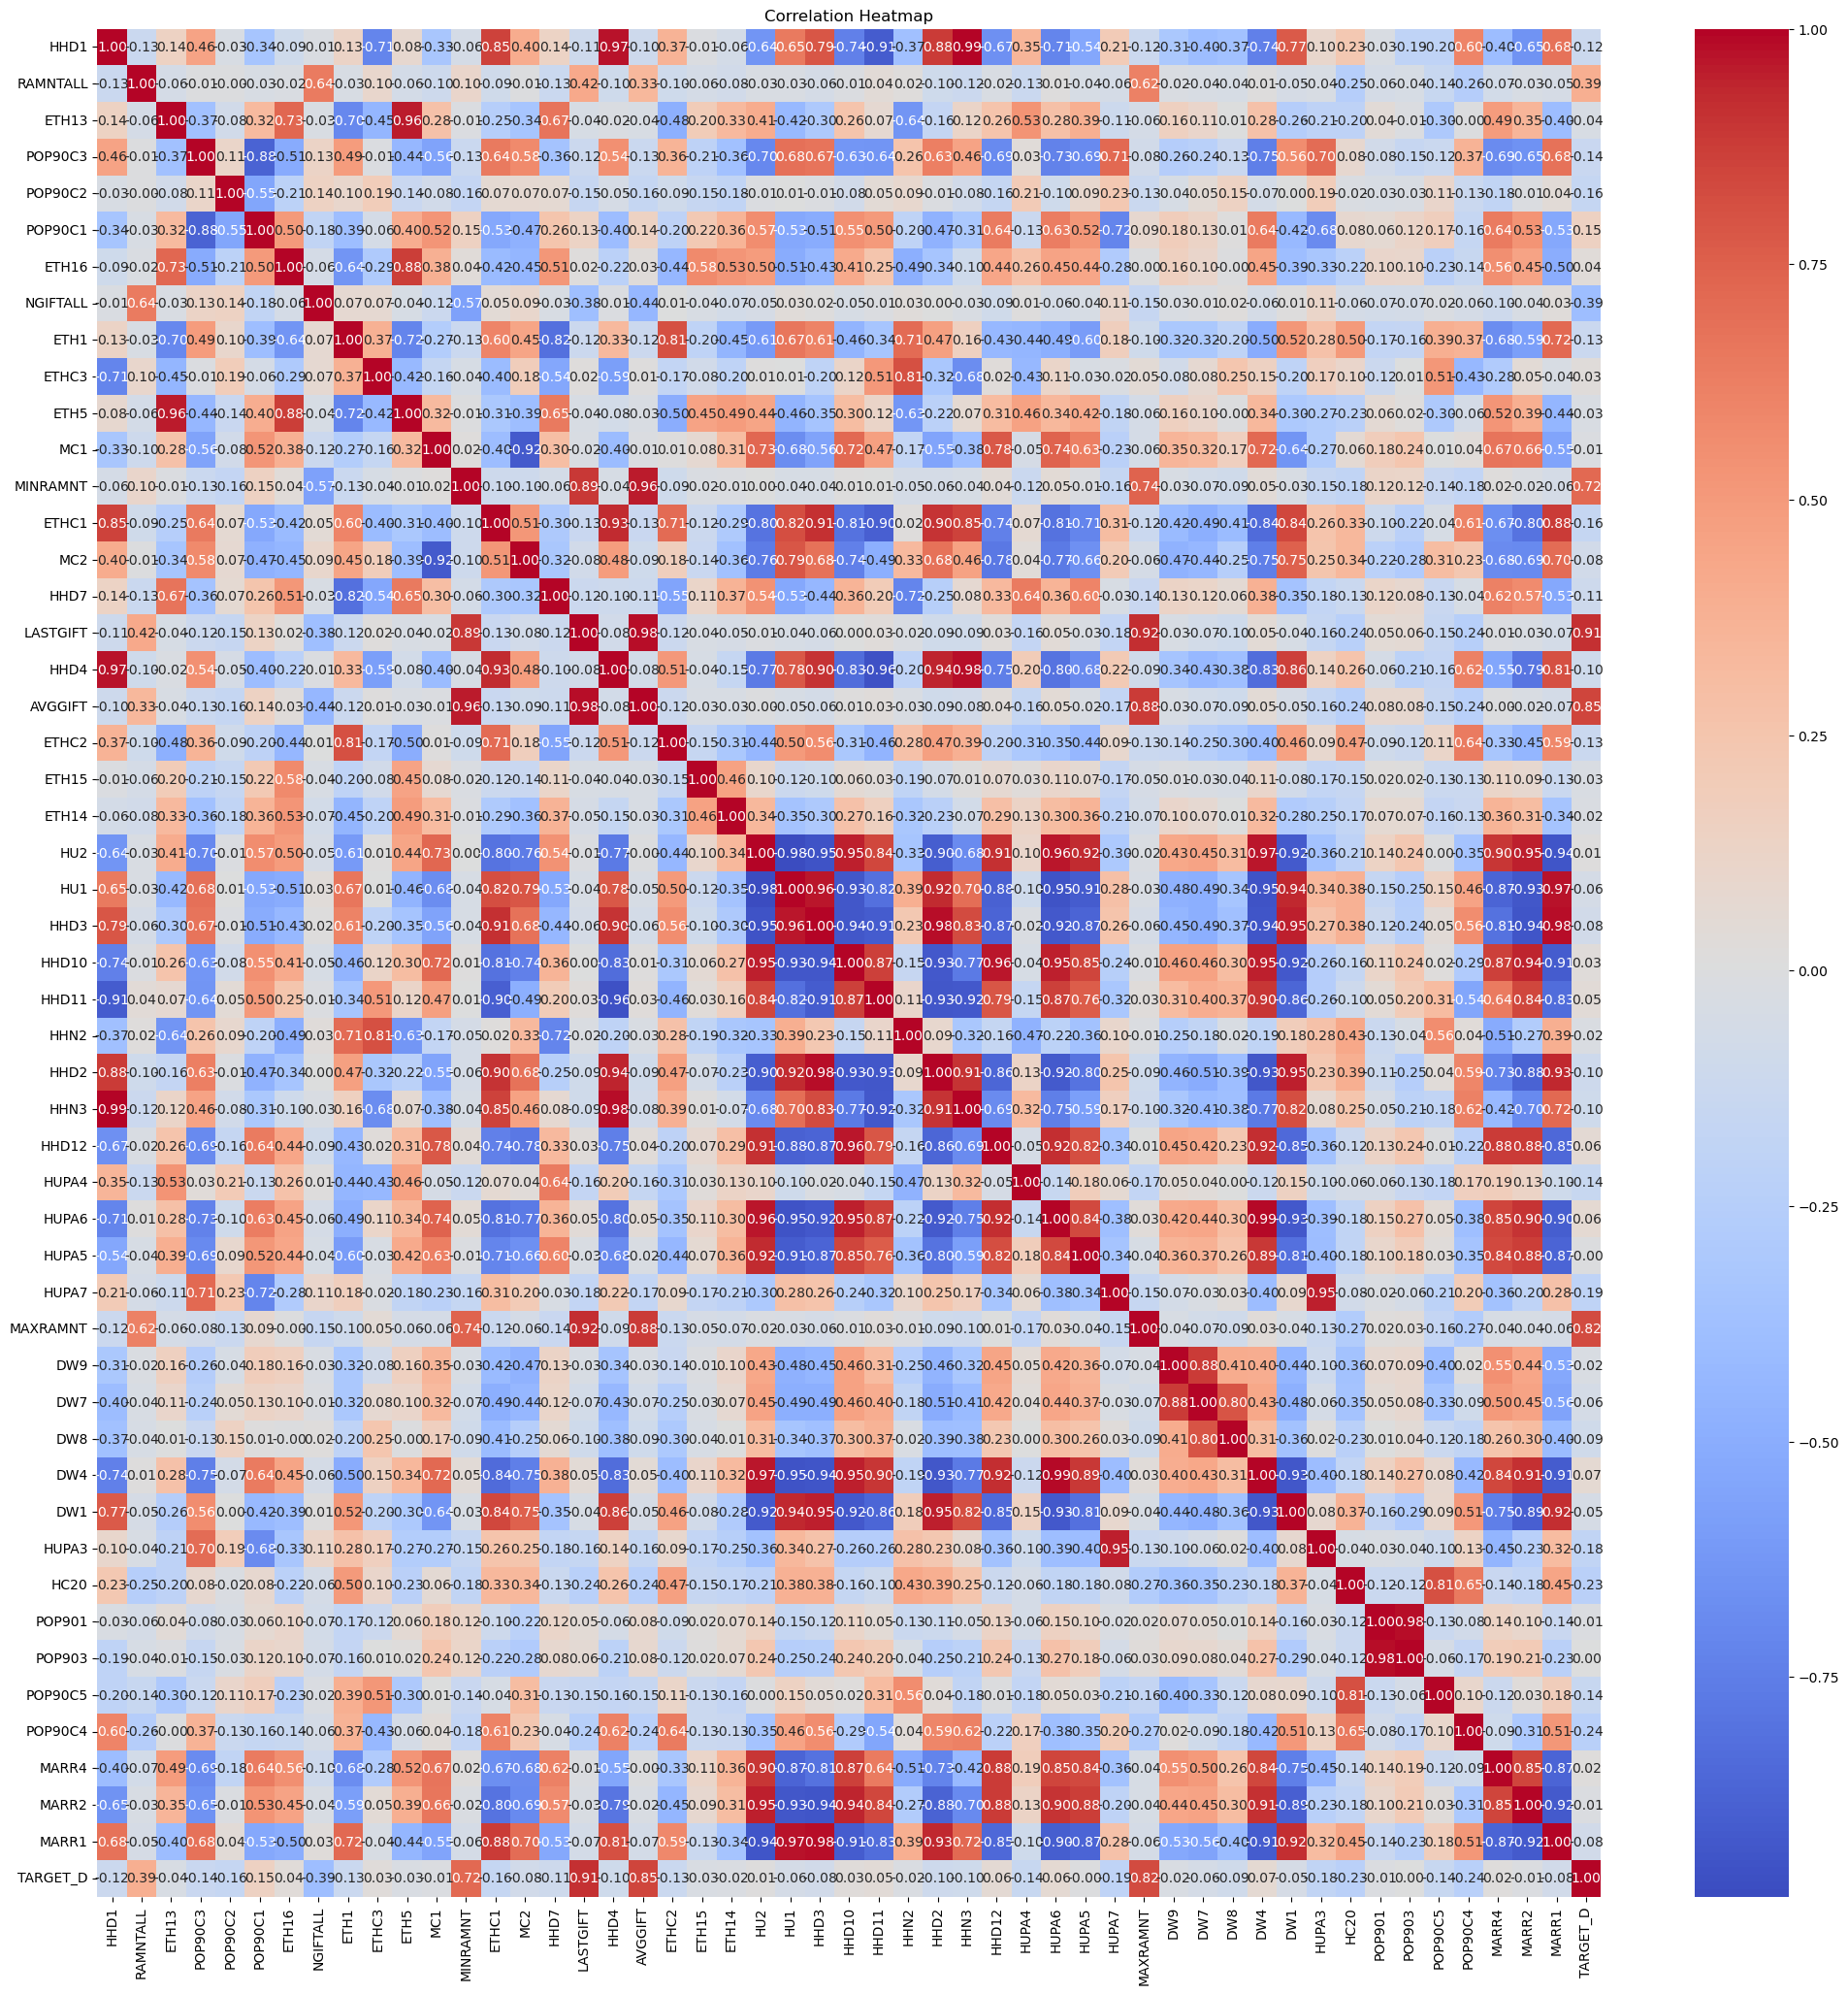

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 25))
correlation_matrix = best_corr1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [57]:
# From the best relation list to the TARGET filtering just the ones with highest values which do not have repeated prefix
import pandas as pd
#Passing through my best_corr_list1
best_list = {
    'COLUMN': [
        'TARGET_D', 'LASTGIFT', 'AVGGIFT', 'MAXRAMNT', 'MINRAMNT', 'RAMNTALL', 'POP90C1', 'ETH16', 'HHD12', 'MARR4',
        'DW4', 'HUPA6', 'MC1', 'HHD10', 'HHN2', 'ETH14', 'ETH5', 'DW1', 'HU2', 'ETH15', 'POP903',
        'POP901', 'HHD11', 'POP90C4', 'HHD3', 'ETH13', 'HUPA5', 'ETHC3', 'DW9', 'HC20', 'HU1',
        'POP90C5', 'HHN3', 'MARR2', 'HHD2', 'MARR1', 'HUPA4', 'DW7', 'ETHC2', 'HHD4', 'DW8',
        'MC2', 'HHD1', 'ETH1', 'POP90C3', 'POP90C2', 'HHD7', 'HUPA7', 'ETHC1', 'HUPA3', 'NGIFTALL'
    ],
    'SCORE': [
        1.000000, 0.645388, 0.516725, 0.443145, 0.295783, 0.247667, 0.057889, 0.042855, 0.038829, 0.036019,
        0.031050, 0.020345, 0.019567, 0.015415, 0.014186, 0.013957, 0.010197, 0.006830, 0.004982, 0.004757,
        0.004506, 0.003010, 0.001640, 0.000345, 0.000069, -0.001931, -0.003081, -0.005478, -0.005660, -0.006912,
        -0.007265, -0.008680, -0.009291, -0.010145, -0.010732, -0.011559, -0.013694, -0.016695, -0.016719, -0.017821,
        -0.019015, -0.023792, -0.030764, -0.036507, -0.038204, -0.041051, -0.041387, -0.048460, -0.063733, -0.065099,
        -0.220247
    ]
}

# Create a DataFrame from the dictionary
df3 = pd.DataFrame(best_list)

# Extract prefixes before the numeric part
df3['Prefix'] = df3['COLUMN'].str.extract(r'([a-zA-Z]+)')

# Create an empty dictionary to store selected columns
selected_columns1 = {}

# Iterate through the DataFrame
for index, row in df3.iterrows():
    column = row['COLUMN']
    prefix = row['Prefix']
    value = row['SCORE']

    # Check if the prefix is already in the selected columns dictionary
    if prefix not in selected_columns1:
        selected_columns1[prefix] = {'COLUMN': column, 'SCORE': value}
    else:
        # Compare values and keep the column with the higher value
        if value > selected_columns1[prefix]['SCORE']:
            selected_columns1[prefix] = {'COLUMN': column, 'SCORE': value}

# Create a new DataFrame with the selected columns
numerical_reg_col_keep = pd.DataFrame(list(selected_columns1.values()))
numerical_reg_col_keep

COLUMN     SCORE
0   TARGET_D  1.000000
1   LASTGIFT  0.645388
2    AVGGIFT  0.516725
3   MAXRAMNT  0.443145
4   MINRAMNT  0.295783
5   RAMNTALL  0.247667
6    POP90C1  0.057889
7      ETH16  0.042855
8      HHD12  0.038829
9      MARR4  0.036019
10       DW4  0.031050
11     HUPA6  0.020345
12       MC1  0.019567
13      HHN2  0.014186
14       HU2  0.004982
15     ETHC3 -0.005478
16      HC20 -0.006912
17  NGIFTALL -0.220247

In [58]:
# Passing the selected features into a list
numerical_reg_col_keep_list = numerical_reg_col_keep['COLUMN'].tolist()
print(numerical_reg_col_keep_list)

['TARGET_D', 'LASTGIFT', 'AVGGIFT', 'MAXRAMNT', 'MINRAMNT', 'RAMNTALL', 'POP90C1', 'ETH16', 'HHD12', 'MARR4', 'DW4', 'HUPA6', 'MC1', 'HHN2', 'HU2', 'ETHC3', 'HC20', 'NGIFTALL']


In [59]:
#drop list based in the difference of columns
columns_to_drop = list(set(numerical_new.columns) - set(numerical_reg_col_keep_list))

In [60]:
#dropping the columns
donors_df_feature_selected = donation_filtered.drop(columns_to_drop, axis=1)

In [61]:
# Checking my numerical feature selected dataframe
donors_df_feature_selected

POP90C1  ETH16  HHN2  MARR4  DW4  HU2  HHD12  ETHC3  HUPA6  MC1  HC20  \
20          99      0    30     22   10   12      5     17      7   61    99   
30          99      2    23     17    0    3      1      4      0   74    99   
45          89      0    43     16   28    4      2     21      0   61    99   
78          99      1    44     27   20   37     13     23      6   55    99   
93          99      0    21     34    0   11      2      3      0   39    99   
...        ...    ...   ...    ...  ...  ...    ...    ...    ...  ...   ...   
95298        0      1    37     17   20   43      6     30      8   60    99   
95309       99      2    36     18   22   28      7     11     13   86    99   
95398       99      1    33     28   30   25      4     14     22   32    99   
95403        0      0    30     20   10   21      3     15      7   38    99   
95410       99      3    26     27    0   12      6     16      0   43    99   

       RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT    AVGGIFT  STATE  \
20        61.00        15      2.00       7.0       5.0   4.066667  other   
30        68.00        11      2.00      10.0       7.0   6.181818     TX   
45       102.00        21      3.00       6.0       5.0   4.857143  other   
78       132.00        12      5.00      17.0      10.0  11.000000     CA   
93        94.00        10      5.00      12.0      12.0   9.400000     GA   
...         ...       ...       ...       ...       ...        ...    ...   
95298    238.07        30      0.07      17.0      17.0   7.935667     CA   
95309     35.00         3      5.00      15.0      15.0  11.666667     CA   
95398    144.00        10      5.00      25.0      20.0  14.400000     WI   
95403    139.00        12      3.00      20.0      20.0  11.583333  other   
95410    498.00        41      5.00      21.0      18.0  12.146341     CA   

       CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
20          12        H      F         3      L      D        A        S   
30          35        H      M         3      L      D        A        T   
45          24        H      F         3      L      D        C        C   
78          13        H      F         2      L      F        A        S   
93          18        H      M         3      L      E        A        S   
...        ...      ...    ...       ...    ...    ...      ...      ...   
95298       36        H      F         3      L      F        A        T   
95309       12        H      F         3      L      F        B        S   
95398       11        H      F         3      L      G        B        S   
95403       49        H      F         2      L      F        D        R   
95410       24        H      F         2      L      F        A        C   

       DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
20            1         87          1      36       1           88   
30            1         90          1       0       2           90   
45            1         86          1      31      10           93   
78            1         90          1      28       7           90   
93            2         92          1      24      10           92   
...         ...        ...        ...     ...     ...          ...   
95298         2         86          1      53       4           89   
95309         1         94          1      47       1           93   
95398         1         86          1      11      10           89   
95403         2         90          1      40       1           90   
95410         1         86          1      40       5           90   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
20               1           94            4           96            3   
30               4           93            1           95           12   
45              12           94            4           96            2   
78               1           95            3           95           11 

In [62]:
# X/y split
X_reg = donors_df_feature_selected.drop(['TARGET_D', 'TARGET_B'], axis=1)
y_reg = donors_df_feature_selected['TARGET_D']

In [63]:
# Check for NaN values in the Series
nan_check_series = X_reg.isna().sum()
nan_check_series

POP90C1         0
ETH16           0
HHN2            0
MARR4           0
DW4             0
HU2             0
HHD12           0
ETHC3           0
HUPA6           0
MC1             0
HC20            0
RAMNTALL        0
NGIFTALL        0
MINRAMNT        0
MAXRAMNT        0
LASTGIFT        0
AVGGIFT         0
STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
dtype: int64

In [64]:
# train-test split
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
print(X_train_reg.shape)
print(X_test_reg.shape)
print(y_train_reg.shape)
print(y_test_reg.shape)

(3874, 39)
(969, 39)
(3874,)
(969,)


In [65]:
#splitting in numerical and categorical
numericalX_train_reg   = X_train_reg.select_dtypes(np.number)
numericalX_test_reg    = X_test_reg.select_dtypes(np.number)
categoricalX_train_reg = X_train_reg.select_dtypes(object) 
categoricalX_test_reg  = X_test_reg.select_dtypes(object) 

In [66]:
# numericalX_train_reg = X_train_reg[numerical_reg_col_keep] 
# numericalX_test_reg = X_test_reg[numerical_reg_col_keep] 
# categoricalX_train_reg = X_train_reg[categorical1.columns] 
# categoricalX_test_reg  = X_test_reg[categorical1.columns] 

In [67]:
print(numericalX_train_reg.shape)
print(numericalX_test_reg.shape)
print(categoricalX_train_reg.shape)
print(categoricalX_test_reg.shape)

(3874, 32)
(969, 32)
(3874, 7)
(969, 7)


In [68]:
# we scale the numericals so we can use the same dataset to perform a regression later.
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train_reg)
scaled_numerical_train_reg = transformer.transform(numericalX_train_reg)
scaled_numerical_train_reg = pd.DataFrame(scaled_numerical_train_reg, columns=numericalX_train_reg.columns)
scaled_numerical_test_reg = transformer.transform(numericalX_test_reg)
scaled_numerical_test_reg  = pd.DataFrame(scaled_numerical_test_reg, columns=numericalX_train_reg.columns)

In [69]:
print(numericalX_train_reg.shape)
print(numericalX_test_reg.shape)
print(categoricalX_train_reg.shape)
print(categoricalX_test_reg.shape)

(3874, 32)
(969, 32)
(3874, 7)
(969, 7)


In [70]:
# we scale the numericals so we can use the same dataset to perform a regression later (in the lab).
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numericalX_train_reg)
scaled_numerical_train_reg = transformer.transform(numericalX_train_reg)
scaled_numerical_train_reg = pd.DataFrame(scaled_numerical_train_reg, columns=numericalX_train_reg.columns)
scaled_numerical_test_reg = transformer.transform(numericalX_test_reg)
scaled_numerical_test_reg  = pd.DataFrame(scaled_numerical_test_reg, columns=numericalX_train_reg.columns)
print(scaled_numerical_train_reg.shape)
print(scaled_numerical_test_reg.shape)

(3874, 32)
(969, 32)


In [71]:
# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later (in the lab).
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', drop='first').fit(categoricalX_train_reg)
encoded_categorical_train_reg = encoder.transform(categoricalX_train_reg).toarray()
encoded_categorical_train_reg = pd.DataFrame(encoded_categorical_train_reg, columns=encoder.get_feature_names_out()) # needed to avoid error
encoded_categorical_test_reg = encoder.transform(categoricalX_test_reg).toarray()
encoded_categorical_test_reg = pd.DataFrame(encoded_categorical_test_reg, columns=encoder.get_feature_names_out())
print(encoded_categorical_train_reg.shape)
print(encoded_categorical_test_reg.shape)

(3874, 24)
(969, 24)


In [72]:
#Concatenating scaled and encoded train/Concatenating scaled and encoded test
X_train_treated_reg = pd.concat([scaled_numerical_train_reg, encoded_categorical_train_reg], axis = 1)
X_test_treated_reg  = pd.concat([scaled_numerical_test_reg,  encoded_categorical_test_reg],  axis = 1)
print(X_train_treated_reg.shape)
print(X_test_treated_reg.shape)

(3874, 56)
(969, 56)


In [73]:
#reset y_train, y_test index because when encoding is done, the index will be reset
y_train_reg = y_train_reg.reset_index(drop=True)
y_test_reg = y_test_reg.reset_index(drop=True)

In [74]:
#Chcking for which model will have a better performace
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Linear Regression', 'Random Forest Regressor','KNeighborsRegressor']

for model, model_name in zip(model_pipeline, model_names):
    model.fit(X_train_treated_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_treated_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)  
    print(f'{model_name}: Mean Squared Error: {mse}, R^2 Score: {r2}')

Linear Regression: Mean Squared Error: 56.437972318095724, R^2 Score: 0.6205102352658549
Random Forest Regressor: Mean Squared Error: 78.18420946590298, R^2 Score: 0.47428821345823746
KNeighborsRegressor: Mean Squared Error: 102.43965269349845, R^2 Score: 0.3111942526744743


In [75]:
'''After observing the results, I've opted to use a Linear Regression model to predict, because it has a lower
mean squared error and a highest r2 score.'''

"After observing the results, I've opted to use a Linear Regression model to predict, because it has a lower\nmean squared error and a highest r2 score."

In [76]:
# Checking my whole dataframe with the predictions column
new_data.head()

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0      0  60.000000       5        9    0         0       39        34   
1      1  46.000000       6        9   16         0       15        55   
2      1  61.611649       3        1    2         0       20        29   
3      0  70.000000       1        4    2         0       23        14   
4      0  78.000000       3        2   60         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1        5     992     264     332   
1        11         6         2       1        9    3611     940     998   
2        33         6         8       1        1    7001    2040    2669   
3        31         3         0       3        0     640     160     219   
4        53        26         3       2        9    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14      19      25      11      23    23    27    50    30   
4      34      19      19      31       7      27    16    26    57    36   

   HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  DW3  DW4  \
0    12     4     61      7     12     19   198   276   97   95    2    2   
1    23     9     69      4      3     24   317   360   99   99    0    0   
2     6     2     63      9      9     19   183   254   69   69    1    6   
3    15     8     63      9      6     23   199   283   85   83    3    4   
4    24    14     42     17      9     33   235   323   99   98    0    0   

   DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5  \
0    0    0    7    7    0   479   635    3    2   86   14   96    4    7   
1    0    0    0    0    0  5468  5218   12   10   96    4   97    3    9   
2    5    3    3    3    0   497   546    2    1   78   22   93    7   18   
3  

In [77]:
new_data.shape

(95412, 338)

In [78]:
donors_df_feature_selected.head()

POP90C1  ETH16  HHN2  MARR4  DW4  HU2  HHD12  ETHC3  HUPA6  MC1  HC20  \
20       99      0    30     22   10   12      5     17      7   61    99   
30       99      2    23     17    0    3      1      4      0   74    99   
45       89      0    43     16   28    4      2     21      0   61    99   
78       99      1    44     27   20   37     13     23      6   55    99   
93       99      0    21     34    0   11      2      3      0   39    99   

    RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT    AVGGIFT  STATE  \
20      61.0        15       2.0       7.0       5.0   4.066667  other   
30      68.0        11       2.0      10.0       7.0   6.181818     TX   
45     102.0        21       3.0       6.0       5.0   4.857143  other   
78     132.0        12       5.0      17.0      10.0  11.000000     CA   
93      94.0        10       5.0      12.0      12.0   9.400000     GA   

    CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
20       12        H      F         3      L      D        A        S   
30       35        H      M         3      L      D        A        T   
45       24        H      F         3      L      D        C        C   
78       13        H      F         2      L      F        A        S   
93       18        H      M         3      L      E        A        S   

    DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  MINRDATE_MM  \
20         1         87          1      36       1           88            1   
30         1         90          1       0       2           90            4   
45         1         86          1      31      10           93           12   
78         1         90          1      28       7           90            1   
93         2         92          1      24      10           92            9   

    MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  FIRSTDATE_YR  \
20           94            4           96            3            87   
30           93            1           95           12            90   
45           94            4           96            2            87   
78           95            3           95           11            90   
93           95            9           95            9            92   

    FIRSTDATE_MM  TARGET_B  TARGET_D  
20             1         1       4.0  
30             4         1       7.0  
45             4         1       5.0  
78             1         1      13.0  
93             9         1      10.0

In [79]:
donors_df_feature_selected.shape

(4843, 41)

In [80]:
#Dropping Target_B and Target_D from the donor_data_feature columns
cols_reg_all = donors_df_feature_selected.columns.tolist()
cols_reg_all.remove('TARGET_B')
cols_reg_all.remove('TARGET_D')
cols_reg_all

['POP90C1',
 'ETH16',
 'HHN2',
 'MARR4',
 'DW4',
 'HU2',
 'HHD12',
 'ETHC3',
 'HUPA6',
 'MC1',
 'HC20',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'AVGGIFT',
 'STATE',
 'CLUSTER',
 'HOMEOWNR',
 'GENDER',
 'DATASRCE',
 'RFA_2R',
 'RFA_2A',
 'GEOCODE2',
 'DOMAIN_A',
 'DOMAIN_B',
 'ODATEW_YR',
 'ODATEW_MM',
 'DOB_YR',
 'DOB_MM',
 'MINRDATE_YR',
 'MINRDATE_MM',
 'MAXRDATE_YR',
 'MAXRDATE_MM',
 'LASTDATE_YR',
 'LASTDATE_MM',
 'FIRSTDATE_YR',
 'FIRSTDATE_MM']

In [81]:
# The loaded dataset with the model prediction has the predcited Target_B as Prediction
# Renaming it to match the existing data
final_data = new_data[new_data['PREDICTIONS']==1]
final_data = final_data.rename({'PREDICTIONS':'TARGET_B'})
final_data_reg = new_data[cols_reg_all]
final_data_reg

POP90C1  ETH16  HHN2  MARR4  DW4  HU2  HHD12  ETHC3  HUPA6  MC1  HC20  \
0            0      0    33     19    2   14      3     25      0   46    99   
1           99      4    21     24    0    4      2      5      0   56    99   
2            0      0    35     19    6   22      3     18      3   38    97   
3            0      1    27     23    4   52      4     13      0   46    93   
4           99      0    26     33    0   10      1      0      0   20    99   
...        ...    ...   ...    ...  ...  ...    ...    ...    ...  ...   ...   
95407       99      2    32     24   32   44      8      5     12   63    99   
95408       96      1    20     20    1   12      1      5      0   83    99   
95409       99      0    29     31    2   34      9     12      0   43    99   
95410       99      3    26     27    0   12      6     16      0   43    99   
95411       99      0    34     18    1    9      2     11      0   66    99   

       RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT    AVGGIFT  STATE  \
0         240.0        31       5.0      12.0      10.0   7.741935     IL   
1          47.0         3      10.0      25.0      25.0  15.666667     CA   
2         202.0        27       2.0      16.0       5.0   7.481481     NC   
3         109.0        16       2.0      11.0      10.0   6.812500     CA   
4         254.0        37       3.0      15.0      15.0   6.864865     FL   
...         ...       ...       ...       ...       ...        ...    ...   
95407      25.0         1      25.0      25.0      25.0  25.000000  other   
95408      20.0         1      20.0      20.0      20.0  20.000000     TX   
95409      58.0         7       3.0      10.0      10.0   8.285714     MI   
95410     498.0        41       5.0      21.0      18.0  12.146341     CA   
95411    3775.0        39      10.0     201.0     100.0  96.794872     NC   

       CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
0           36        H      F         3      L      E        C        T   
1           14        H      M         3      L      G        A        S   
2           43        U      M         3      L      E        C        R   
3           44        U      F         3      L      E        C        R   
4           16        H      F         3      L      F        A        S   
...        ...      ...    ...       ...    ...    ...      ...      ...   
95407       27        H      M         3      L      G        C        C   
95408       24        H      M         3      L      F        A        C   
95409       30        H      M         3      L      E        B        C   
95410       24        H      F         2      L      F        A        C   
95411       24        U      F         3      L      G        C        C   

       DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0             2         89          1      37      12           92   
1             1         94          1      52       2           93   
2             2         90          1       0       2           91   
3             2         87          1      28       1           87   
4             2         86          1      20       1           93   
...         ...        ...        ...     ...     ...          ...   
95407         2         96          1       0       2           96   
95408         1         96          1      50       1           96   
95409         3         95          1      38       1           96   
95410         1         86          1      40       5           90   
95411         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12 

In [82]:
# splitting again in mumerical and categorical
new_data_reg_num = X_train_reg.select_dtypes(np.number) 
new_data_reg_cat = X_train_reg.select_dtypes(object) 
print(new_data_reg_num.shape)
print(new_data_reg_cat.shape)

(3874, 32)
(3874, 7)


In [83]:
#Scaling and Encoding the data using the existing scaler and encoder.
scaled_new_data_reg_num = transformer.transform(new_data_reg_num)
scaled_new_data_reg_num  = pd.DataFrame(scaled_new_data_reg_num, columns=new_data_reg_num.columns)

encoded_new_data_reg_cat = encoder.transform(new_data_reg_cat).toarray()
encoded_new_data_reg_cat = pd.DataFrame(encoded_new_data_reg_cat, columns=encoder.get_feature_names_out())

print(scaled_new_data_reg_num.shape)
print(encoded_new_data_reg_cat.shape)

(3874, 32)
(3874, 24)


In [84]:
# Concatenating my new treated dataframe ( scaled and encoded)
new_data_reg_treated  = pd.concat([scaled_new_data_reg_num, encoded_new_data_reg_cat],  axis = 1)

In [85]:
# Checking the shape
new_data_reg_treated.shape

(3874, 56)

In [86]:
# Applying my trained model
model_pipeline = [model1]
model_names = ['Linear Regression']
y_pred_amount = {}
for model, model_name in zip(model_pipeline, model_names):
    y_pred_amount[model_name] = model.predict(new_data_reg_treated)
y_pred_amount

{'Linear Regression': array([16.09312469, 27.09761136, 16.21907786, ..., 20.13691987,
         9.44750522,  8.38705973])}

In [87]:
# Getting my predicted amount as a column in my dataframe
y_pred_amount_df = pd.DataFrame(y_pred_amount, columns = ['PREDICTED_AMOUNT'])
new_data_pred_amount = pd.concat([final_data_reg,y_pred_amount_df], axis=1)

In [88]:
new_data_pred_amount

POP90C1  ETH16  HHN2  MARR4  DW4  HU2  HHD12  ETHC3  HUPA6  MC1  HC20  \
0            0      0    33     19    2   14      3     25      0   46    99   
1           99      4    21     24    0    4      2      5      0   56    99   
2            0      0    35     19    6   22      3     18      3   38    97   
3            0      1    27     23    4   52      4     13      0   46    93   
4           99      0    26     33    0   10      1      0      0   20    99   
...        ...    ...   ...    ...  ...  ...    ...    ...    ...  ...   ...   
95407       99      2    32     24   32   44      8      5     12   63    99   
95408       96      1    20     20    1   12      1      5      0   83    99   
95409       99      0    29     31    2   34      9     12      0   43    99   
95410       99      3    26     27    0   12      6     16      0   43    99   
95411       99      0    34     18    1    9      2     11      0   66    99   

       RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT    AVGGIFT  STATE  \
0         240.0        31       5.0      12.0      10.0   7.741935     IL   
1          47.0         3      10.0      25.0      25.0  15.666667     CA   
2         202.0        27       2.0      16.0       5.0   7.481481     NC   
3         109.0        16       2.0      11.0      10.0   6.812500     CA   
4         254.0        37       3.0      15.0      15.0   6.864865     FL   
...         ...       ...       ...       ...       ...        ...    ...   
95407      25.0         1      25.0      25.0      25.0  25.000000  other   
95408      20.0         1      20.0      20.0      20.0  20.000000     TX   
95409      58.0         7       3.0      10.0      10.0   8.285714     MI   
95410     498.0        41       5.0      21.0      18.0  12.146341     CA   
95411    3775.0        39      10.0     201.0     100.0  96.794872     NC   

       CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
0           36        H      F         3      L      E        C        T   
1           14        H      M         3      L      G        A        S   
2           43        U      M         3      L      E        C        R   
3           44        U      F         3      L      E        C        R   
4           16        H      F         3      L      F        A        S   
...        ...      ...    ...       ...    ...    ...      ...      ...   
95407       27        H      M         3      L      G        C        C   
95408       24        H      M         3      L      F        A        C   
95409       30        H      M         3      L      E        B        C   
95410       24        H      F         2      L      F        A        C   
95411       24        U      F         3      L      G        C        C   

       DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  \
0             2         89          1      37      12           92   
1             1         94          1      52       2           93   
2             2         90          1       0       2           91   
3             2         87          1      28       1           87   
4             2         86          1      20       1           93   
...         ...        ...        ...     ...     ...          ...   
95407         2         96          1       0       2           96   
95408         1         96          1      50       1           96   
95409         3         95          1      38       1           96   
95410         1         86          1      40       5           90   
95411         1         88          1      18       1           88   

       MINRDATE_MM  MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  \
0                8           94            2           95           12   
1               10           95           12           95           12   
2               11           92            7           95           12   
3               11           94           11           95           12 

In [89]:
# Check unique values fo my new_data_pred_amount
#new_data_pred_amount['PREDICTED_AMOUNT'].unique()

In [92]:
#STEPS TO FOLLOW FOR THE SECOND PART :
# save it to the dataframe  - done
# get the predictions column to the main original dataset - done
# load all back from csv but select only were target B= 1 - done
# feature selection first with TARGET B =1 - done
# x/y split
# train/test split
# Splitting data in categorical and numerical
# scalling
# encoding
# concatenating
# run model trainig set
# load the last dataframe saved 'whole_data_treated'
# match the columns of both
# re run the model 
# and then predict again
